In [1]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 1.6 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681831 sha256=7b488206385a1f4eba65b8b45352898a6954be56b81d758dbcd6859c676639a1
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Problem 1: Calculate the number of total cases, total deaths, total recovered, and total active by time (day units)

In [4]:
# day start from 1/22/20 to 8/4/21

cols = confirmed_df.loc[:,:'8/4/21'].keys()
confirmed_df = confirmed_df.loc[:,:'8/4/21']
deaths_df = deaths_df.loc[:, :'8/4/21']
recoveries_df = recoveries_df.loc[:,:'8/4/21']
dates = confirmed_df.loc[:,cols[4]:].keys()

total_confirmed = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recoveries = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1,1)[:,0])



In [5]:
len(dates)

561

In [6]:
total_confirmed = np.array(confirmed_df.iloc[:,4:].sum())
total_deaths = np.array(deaths_df.iloc[:,4:].sum())
total_recoveries = np.array(recoveries_df.iloc[:,4:].sum())
total_active = total_confirmed - total_deaths - total_recoveries

In [7]:
print("Total confirmed cases: ", total_confirmed[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recoveries[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


### Problem 2: Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [8]:
df_total = pd.DataFrame(zip(total_confirmed,total_deaths,total_recoveries,total_active),
                        index = adjusted_dates,
                        columns = ['total_confirmed','total_deaths','total_recoveries','total_active'])

In [9]:
df_total

total_confirmed  total_deaths  total_recoveries  total_active
0                557            17                30           510
1                657            18                32           607
2                944            26                39           879
3               1437            42                42          1353
4               2120            56                56          2008
..               ...           ...               ...           ...
556        198389684       4246601         129705211      64437872
557        198872752       4254020         129994389      64624343
558        199443855       4262171         130277533      64904151
559        200078130       4272524         130582001      65223605
560        200758588       4283016         130899061      65576511

[561 rows x 4 columns]

In [10]:
df_total_log10 = np.log10(df_total)

Text(0, 0.5, 'number of cases')

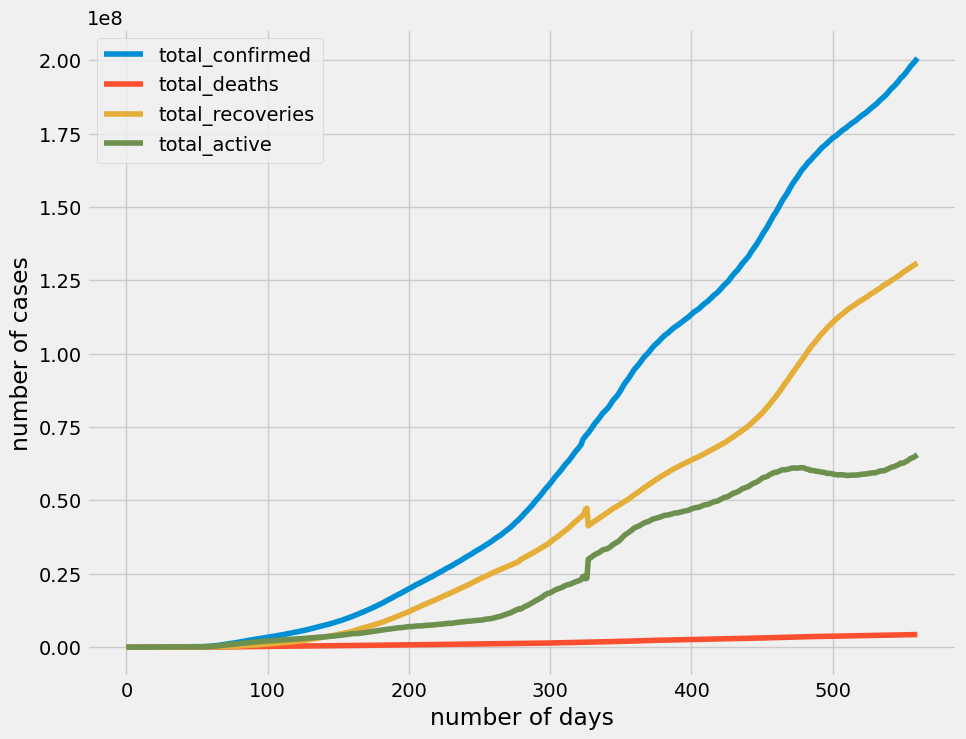

In [11]:
# number of total cases, total deaths, total recoveries, total active
df_total.plot(kind = 'line', figsize = (10,8))
plt.xlabel('number of days')
plt.ylabel('number of cases')


Text(0, 0.5, 'number of log10 cases ')

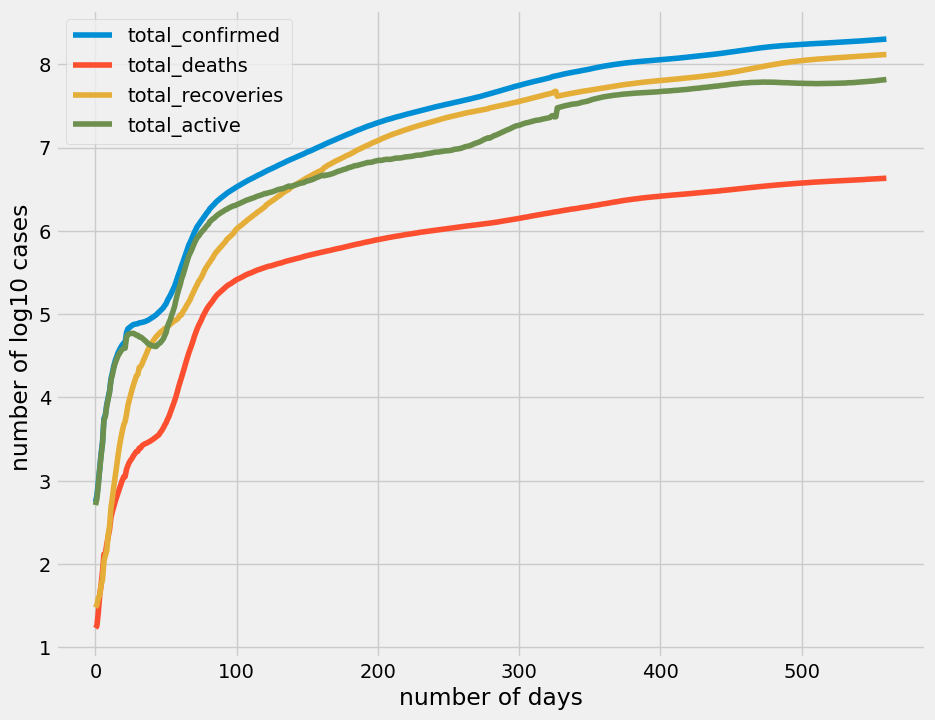

In [12]:
df_total_log10.plot(kind = 'line', figsize = (10,8))
plt.xlabel('number of days')
plt.ylabel('number of log10 cases ')

### Problem 3: Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart

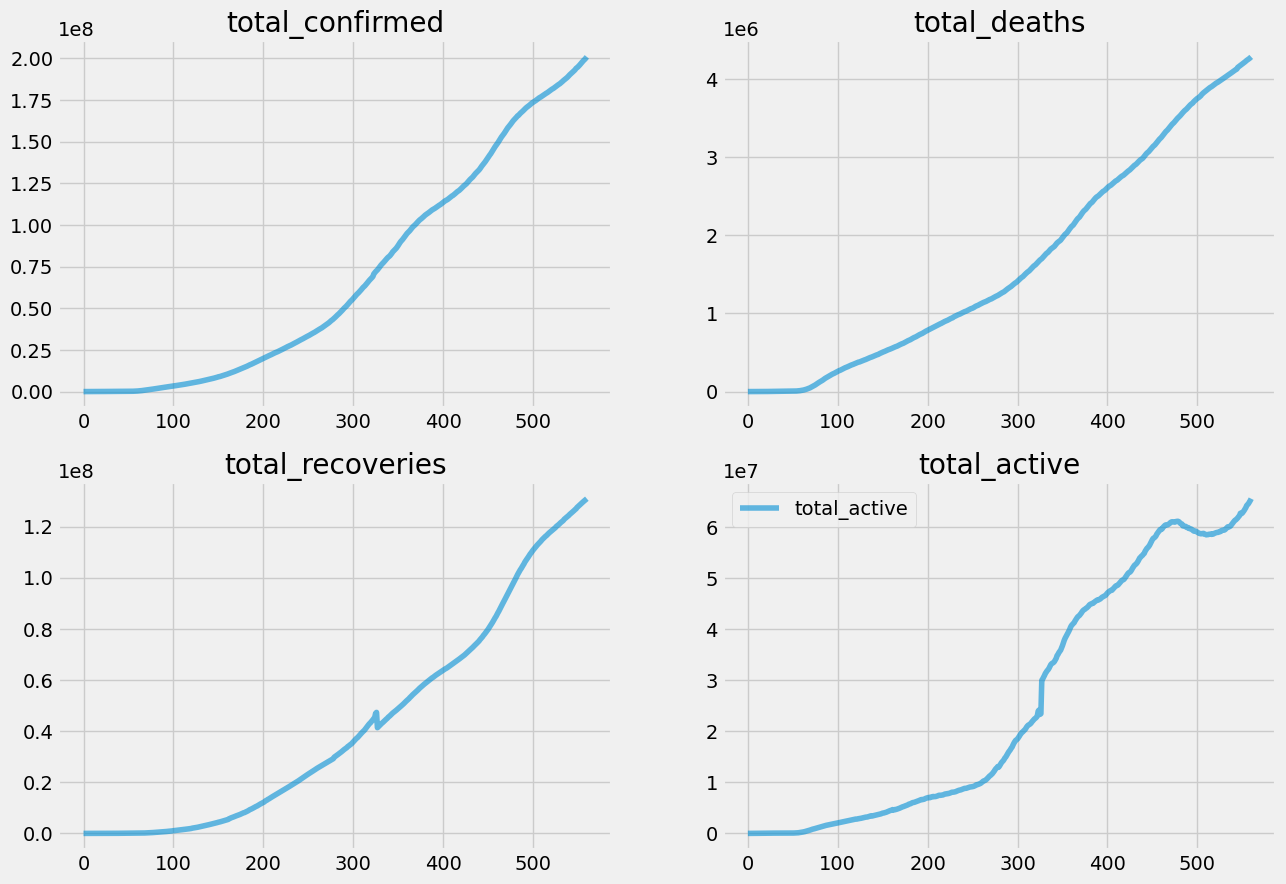

In [13]:
fig = plt.figure(figsize = (25,20))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

df_total['total_confirmed'].plot(kind = 'line', figsize = (14,10),ax = ax0, alpha = 0.6, label = 'total_confirmed')
ax0.set_title('total_confirmed')


df_total['total_deaths'].plot(kind = 'line', figsize = (14,10), ax = ax1, alpha = 0.6)
ax1.set_title('total_deaths')


df_total['total_recoveries'].plot(kind = 'line',figsize = (14,10), ax =ax2, alpha = 0.6)
ax2.set_title('total_recoveries')

df_total['total_active'].plot(kind = 'line', figsize = (14,10), ax= ax3, alpha =0.6)
ax3.set_title('total_active')

plt.legend()


### Problem 4: Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [14]:
def fluctuate(total):
    ans = np.array(0)
    for i in range(1,len(total)):
        ans =np.append(ans,total[i] - total[i-1])
    return ans

In [15]:
df_increase = df_total.apply(fluctuate,axis = 0)

In [16]:
df_increase

total_confirmed  total_deaths  total_recoveries  total_active
0                  0             0                 0             0
1                100             1                 2            97
2                287             8                 7           272
3                493            16                 3           474
4                683            14                14           655
..               ...           ...               ...           ...
556           517345          8844            303929        204572
557           483068          7419            289178        186471
558           571103          8151            283144        279808
559           634275         10353            304468        319454
560           680458         10492            317060        352906

[561 rows x 4 columns]

### Problem 5: Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

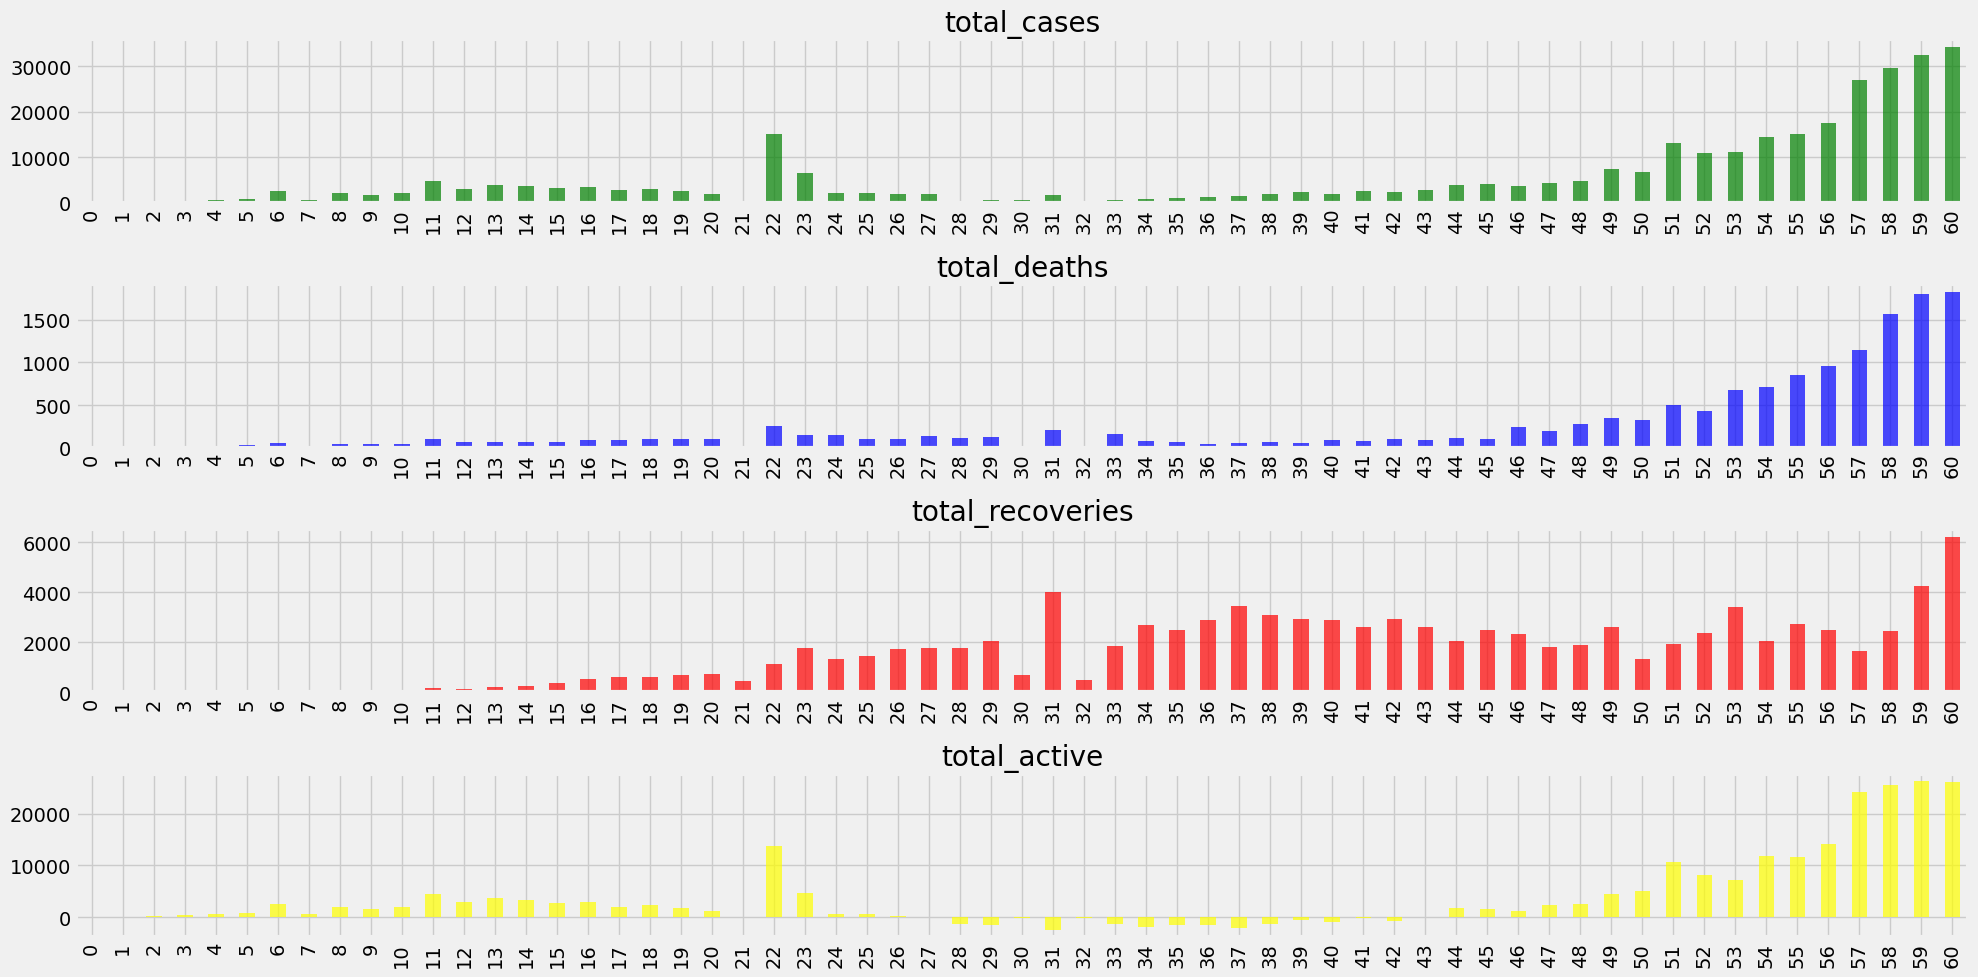

In [17]:
fig = plt.figure()

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

df_increase.loc[:60,'total_confirmed'].plot(kind = 'bar',figsize = (20,10), alpha = 0.7, ax = ax1, color = 'green')
ax1.set_title('total_cases')

df_increase.loc[:60,'total_deaths'].plot(kind = 'bar',figsize = (20,10),alpha = 0.7 , ax= ax2, color = 'blue')
ax2.set_title('total_deaths')

df_increase.loc[:60,'total_recoveries'].plot(kind = 'bar',figsize = (20,10), alpha = 0.7, ax = ax3, color = 'red')
ax3.set_title('total_recoveries')

df_increase.loc[:60,'total_active'].plot(kind = 'bar',figsize = (20,10), alpha = 0.7, ax = ax4, color = 'yellow')
ax4.set_title('total_active')

plt.tight_layout()

### Problem 6: Calculate the global mortality and recovered rate in percentage by time.

In [18]:
len(total_confirmed)

561

In [19]:
mortality_rate = np.round(np.array(total_deaths*100/ total_confirmed),2)
recovery_rate = np.array(total_recoveries*100/ total_confirmed)

In [20]:
df_rate = pd.DataFrame(zip(mortality_rate,recovery_rate),
                       index = adjusted_dates,
                       columns = ['mortality_rate','recovery_rate'])

In [21]:
df_rate

mortality_rate  recovery_rate
0              3.05       5.385996
1              2.74       4.870624
2              2.75       4.131356
3              2.92       2.922756
4              2.64       2.641509
..              ...            ...
556            2.14      65.379010
557            2.14      65.365611
558            2.14      65.320405
559            2.14      65.265505
560            2.13      65.202222

[561 rows x 2 columns]

### Problem 7:

7.1

Visualize the mortality rate in by time (day units) using the line chart.

Using the dashline to visualize the average mortality rate of all the time.

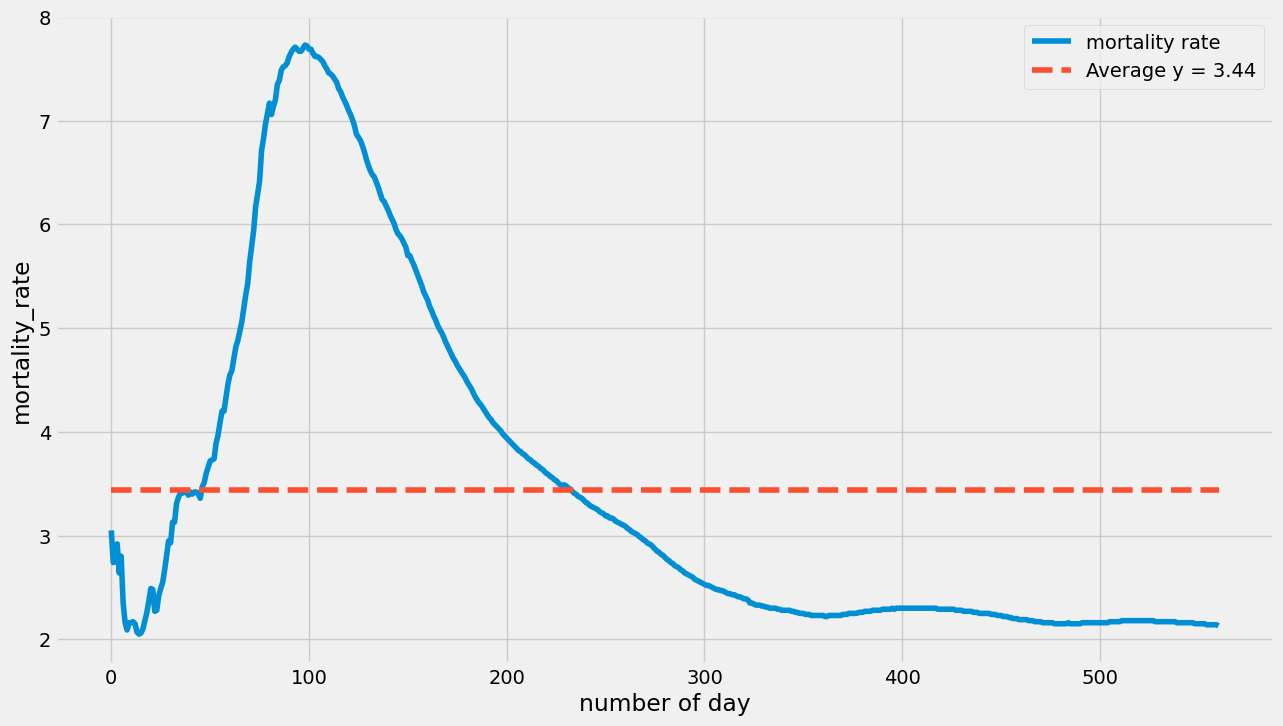

In [22]:
plt.figure(figsize = (14,8))
ax = sns.lineplot(x = df_rate.index, y = df_rate['mortality_rate'], label = 'mortality rate')
ax.set_xlabel('number of day')
s = 'Average y = '+ str(np.round(np.mean(df_rate['mortality_rate']),2))
ax = sns.lineplot(x = df_rate.index,y = np.mean(df_rate['mortality_rate']), label = s, ls = '--')



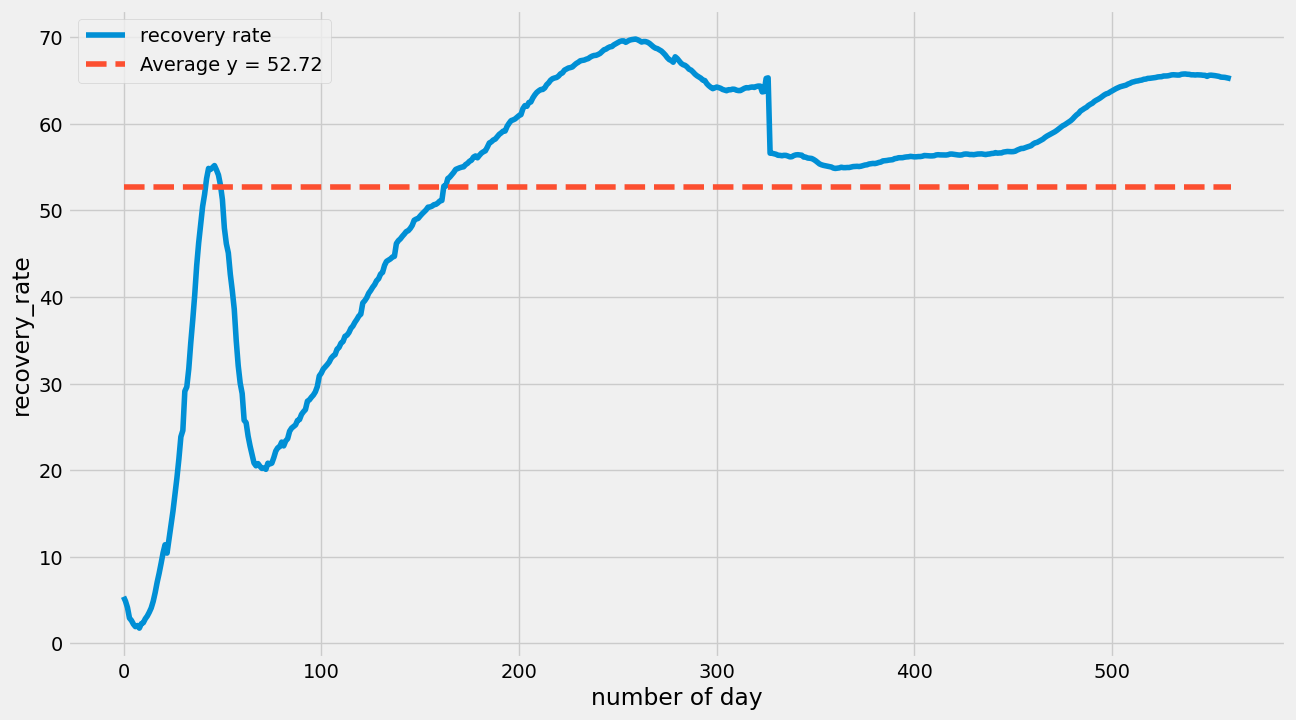

In [23]:
plt.figure(figsize = (14,8))
ax = sns.lineplot(x = df_rate.index, y = df_rate['recovery_rate'], label = 'recovery rate')
ax.set_xlabel('number of day')
s = 'Average y = '+ str(np.round(np.mean(df_rate['recovery_rate']),2))
ax = ax = sns.lineplot(x = df_rate.index, y = np.round(np.mean(df_rate['recovery_rate']),2), label = s,ls = '--')

# 5. Continent Analysis


### Data Prerocessing

In [24]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


### Problem 8: Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [25]:
dates = [i for i in confirmed_df.loc[:,cols[4]:cols[-1]].keys()]

In [26]:
continent_lst_confirmed = [country_to_continent_code(country) for country in confirmed_df['Country/Region']]

In [27]:
continent_lst_confirmed = [continents[conti_code] for conti_code in continent_lst_confirmed]

In [28]:
confirmed_df['continent'] = continent_lst_confirmed

In [29]:
new_pos = ['Province/State','Country/Region','Lat','Long','continent'] + dates

In [30]:
confirmed_df = confirmed_df[new_pos]

In [41]:
confirmed_df

Province/State        Country/Region        Lat        Long continent  \
0              NaN           Afghanistan  33.939110   67.709953      Asia   
1              NaN               Albania  41.153300   20.168300    Europe   
2              NaN               Algeria  28.033900    1.659600    Africa   
3              NaN               Andorra  42.506300    1.521800    Europe   
4              NaN                Angola -11.202700   17.873900    Africa   
..             ...                   ...        ...         ...       ...   
284            NaN    West Bank and Gaza  31.952200   35.233200    Others   
285            NaN  Winter Olympics 2022  39.904200  116.407400    Others   
286            NaN                 Yemen  15.552727   48.516388      Asia   
287            NaN                Zambia -13.133897   27.849332    Africa   
288            NaN              Zimbabwe -19.015438   29.154857    Africa   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...   144285   145008   
1          0        0        0        0        0  ...   132891   132922   
2          0        0        0        0        0  ...   163660   165204   
3          0        0        0        0        0  ...    14577    14586   
4          0        0        0        0        0  ...    41879    42110   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   316088   316189   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     7012     7022   
287        0        0        0        0        0  ...   192316   192956   
288        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     145552   145996   146523   147154  147501  147985  148572  148933  
1     132952   132999   133036   133081  133121  133146  133211  133310  
2     167131   168668   170189   171392  172564  173922  175229  176724  
3      14586    14655    14678    14678   14678   14747   14766   14797  
4      42288    42486    42646    42777   42815   42970   43070   43158  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284   316328   316487   316603   316738  316861  317083  317264  317404  
285        0        0        0        0       0       0       0       0  
286     7027     7042     7058     7061    7070    7081    7086    7096  
287   193432   194140   195096   195816  196293  196490  197123  197791  
288   103567   105656   107490   108860  109546  110855  112435  113526  

[289 rows x 566 columns]

In [31]:
continent_lst_deaths = [country_to_continent_code(country) for country in deaths_df['Country/Region']]

In [32]:

continent_lst_deaths = [continents[conti] for conti in continent_lst_deaths]

In [33]:
deaths_df['continent'] = continent_lst_deaths

In [34]:
deaths_df = deaths_df[new_pos]

In [35]:
deaths_df

Province/State        Country/Region        Lat        Long continent  \
0              NaN           Afghanistan  33.939110   67.709953      Asia   
1              NaN               Albania  41.153300   20.168300    Europe   
2              NaN               Algeria  28.033900    1.659600    Africa   
3              NaN               Andorra  42.506300    1.521800    Europe   
4              NaN                Angola -11.202700   17.873900    Africa   
..             ...                   ...        ...         ...       ...   
284            NaN    West Bank and Gaza  31.952200   35.233200    Others   
285            NaN  Winter Olympics 2022  39.904200  116.407400    Others   
286            NaN                 Yemen  15.552727   48.516388      Asia   
287            NaN                Zambia -13.133897   27.849332    Africa   
288            NaN              Zimbabwe -19.015438   29.154857    Africa   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...     6477     6515   
1          0        0        0        0        0  ...     2456     2456   
2          0        0        0        0        0  ...     4087     4112   
3          0        0        0        0        0  ...      127      127   
4          0        0        0        0        0  ...      991      994   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...     3599     3600   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     1373     1374   
287        0        0        0        0        0  ...     3295     3316   
288        0        0        0        0        0  ...     3173     3280   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0       6577     6615     6677     6708    6737    6774    6804    6836  
1       2457     2457     2457     2457    2457    2457    2457    2457  
2       4161     4189     4219     4254    4291    4329    4370    4404  
3        127      127      128      128     128     128     128     128  
4       1000     1003     1008     1011    1016    1018    1022    1026  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284     3601     3601     3601     3603    3604    3609    3609    3609  
285        0        0        0        0       0       0       0       0  
286     1374     1374     1375     1375    1377    1378    1380    1380  
287     3338     3355     3376     3389    3406    3412    3422    3430  
288     3340     3421     3490     3532    3583    3635    3676    3711  

[289 rows x 566 columns]

In [36]:
continent_lst_recoveries = [country_to_continent_code(country) for country in recoveries_df['Country/Region']]

In [37]:
continent_lst_recoveries = [continents[conti] for conti in continent_lst_recoveries]

In [38]:
recoveries_df['continent'] = continent_lst_recoveries

In [39]:
recoveries_df = recoveries_df[new_pos]

In [40]:
recoveries_df

Province/State        Country/Region        Lat        Long continent  \
0              NaN           Afghanistan  33.939110   67.709953      Asia   
1              NaN               Albania  41.153300   20.168300    Europe   
2              NaN               Algeria  28.033900    1.659600    Africa   
3              NaN               Andorra  42.506300    1.521800    Europe   
4              NaN                Angola -11.202700   17.873900    Africa   
..             ...                   ...        ...         ...       ...   
269            NaN    West Bank and Gaza  31.952200   35.233200    Others   
270            NaN  Winter Olympics 2022  39.904200  116.407400    Others   
271            NaN                 Yemen  15.552727   48.516388      Asia   
272            NaN                Zambia -13.133897   27.849332    Africa   
273            NaN              Zimbabwe -19.015438   29.154857    Africa   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...    82586    82586   
1          0        0        0        0        0  ...   130152   130166   
2          0        0        0        0        0  ...   111322   112050   
3          0        0        0        0        0  ...    14077    14113   
4          0        0        0        0        0  ...    35686    35742   
..       ...      ...      ...      ...      ...  ...      ...      ...   
269        0        0        0        0        0  ...   311526   311560   
270        0        0        0        0        0  ...        0        0   
271        0        0        0        0        0  ...     4166     4168   
272        0        0        0        0        0  ...   182665   183534   
273        0        0        0        0        0  ...    67827    70496   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0      82586    82586    82586    82586   82586   82586   82586   82586  
1     130174   130187   130205   130222  130243  130256  130291  130314  
2     112900   113707   114531   115276  116009  116770  117557  118409  
3      14113    14180    14210    14210   14210   14296   14348   14380  
4      35964    36025    36708    37255   37397   38360   39389   39582  
..       ...      ...      ...      ...     ...     ...     ...     ...  
269   311622   311714   311772   311832  311918  312149  312289  312320  
270        0        0        0        0       0       0       0       0  
271     4168     4171     4171     4185    4200    4212    4232    4251  
272   183957   185210   186211   187236  188106  188950  189341  189658  
273    71383    73394    74562    75856   76665   79420   81570   82994  

[274 rows x 566 columns]

### Problem 9:

Create the countries_df data frame with the index as the "Country/Region" field.
These column infor will be:
- continent: Country continent.
- Confirmed: Total number of confirmed.
- Deaths: Total number of deaths.
- Recoveries: Total number of recoveries.
- Active: Total number of active.
- Mortality Rate: Mortality rate in percentage.

In [42]:
lst_country = confirmed_df.drop_duplicates(subset = ['Country/Region'])

In [43]:
lst_country.set_index('Country/Region',inplace = True)

In [44]:
country_info = lst_country[['continent','Lat','Long']]

In [45]:
country_info

continent        Lat        Long
Country/Region                                       
Afghanistan               Asia  33.939110   67.709953
Albania                 Europe  41.153300   20.168300
Algeria                 Africa  28.033900    1.659600
Andorra                 Europe  42.506300    1.521800
Angola                  Africa -11.202700   17.873900
...                        ...        ...         ...
West Bank and Gaza      Others  31.952200   35.233200
Winter Olympics 2022    Others  39.904200  116.407400
Yemen                     Asia  15.552727   48.516388
Zambia                  Africa -13.133897   27.849332
Zimbabwe                Africa -19.015438   29.154857

[201 rows x 3 columns]

In [46]:
new_pos2 = ['Country/Region'] + dates

In [47]:
countries_confirmed = confirmed_df[new_pos2].groupby(['Country/Region']).sum()

In [48]:
countries_confirmed =  countries_confirmed.iloc[:,-1]

In [49]:
countries_confirmed.name = 'Confirmed'

In [50]:
countries_deaths = deaths_df[new_pos2].groupby(['Country/Region']).sum()

In [51]:
countries_deaths = countries_deaths.iloc[:,-1]

In [52]:
countries_deaths.name = 'Deaths'

In [53]:
countries_recoveries = recoveries_df[new_pos2].groupby(['Country/Region']).sum()

In [54]:
countries_recoveries = countries_recoveries.iloc[:,-1]

In [55]:
countries_recoveries.name = 'Recoveries'

In [56]:
countries_df = pd.concat([country_info,countries_confirmed,countries_deaths,countries_recoveries],axis= 1)

In [57]:
# total active
countries_df['Active'] = np.array(countries_df['Confirmed']) - np.array(countries_df['Deaths']) - np.array(countries_df['Recoveries'])

In [58]:
countries_df['mortality_rate'] = np.round(countries_df['Deaths'] *100/countries_df['Confirmed'],2)

In [59]:
countries_df

continent        Lat        Long  Confirmed  Deaths  \
Country/Region                                                             
Afghanistan               Asia  33.939110   67.709953     148933    6836   
Albania                 Europe  41.153300   20.168300     133310    2457   
Algeria                 Africa  28.033900    1.659600     176724    4404   
Andorra                 Europe  42.506300    1.521800      14797     128   
Angola                  Africa -11.202700   17.873900      43158    1026   
...                        ...        ...         ...        ...     ...   
West Bank and Gaza      Others  31.952200   35.233200     317404    3609   
Winter Olympics 2022    Others  39.904200  116.407400          0       0   
Yemen                     Asia  15.552727   48.516388       7096    1380   
Zambia                  Africa -13.133897   27.849332     197791    3430   
Zimbabwe                Africa -19.015438   29.154857     113526    3711   

                      Recoveries  Active  mortality_rate  
Country/Region                                            
Afghanistan                82586   59511            4.59  
Albania                   130314     539            1.84  
Algeria                   118409   53911            2.49  
Andorra                    14380     289            0.87  
Angola                     39582    2550            2.38  
...                          ...     ...             ...  
West Bank and Gaza        312320    1475            1.14  
Winter Olympics 2022           0       0             NaN  
Yemen                       4251    1465           19.45  
Zambia                    189658    4703            1.73  
Zimbabwe                   82994   26821            3.27  

[201 rows x 8 columns]

In [60]:
countries_df[countries_df['Active']<0]

continent        Lat      Long  Confirmed  Deaths  \
Country/Region                                                          
Austria                Europe  47.516200  14.55010     655955   13147   
Guyana          South America   4.860416 -58.93018      22643     549   
Peru            South America  -9.190000 -75.01520    2119068  196673   

                Recoveries  Active  mortality_rate  
Country/Region                                      
Austria             644388   -1580            2.00  
Guyana               22327    -233            2.42  
Peru               2086086 -163691            9.28

In [61]:
countries_df.drop(['Austria','Guyana','Peru'],inplace =True)

In [62]:
countries_df.isna().sum()

continent         0
Lat               0
Long              0
Confirmed         0
Deaths            0
Recoveries        0
Active            0
mortality_rate    7
dtype: int64

In [63]:
countries_df.dropna(inplace = True)

In [64]:
countries_df

continent        Lat        Long  Confirmed  Deaths  \
Country/Region                                                           
Afghanistan             Asia  33.939110   67.709953     148933    6836   
Albania               Europe  41.153300   20.168300     133310    2457   
Algeria               Africa  28.033900    1.659600     176724    4404   
Andorra               Europe  42.506300    1.521800      14797     128   
Angola                Africa -11.202700   17.873900      43158    1026   
...                      ...        ...         ...        ...     ...   
Vietnam                 Asia  14.058324  108.277199     181756    2327   
West Bank and Gaza    Others  31.952200   35.233200     317404    3609   
Yemen                   Asia  15.552727   48.516388       7096    1380   
Zambia                Africa -13.133897   27.849332     197791    3430   
Zimbabwe              Africa -19.015438   29.154857     113526    3711   

                    Recoveries  Active  mortality_rate  
Country/Region                                          
Afghanistan              82586   59511            4.59  
Albania                 130314     539            1.84  
Algeria                 118409   53911            2.49  
Andorra                  14380     289            0.87  
Angola                   39582    2550            2.38  
...                        ...     ...             ...  
Vietnam                  54332  125097            1.28  
West Bank and Gaza      312320    1475            1.14  
Yemen                     4251    1465           19.45  
Zambia                  189658    4703            1.73  
Zimbabwe                 82994   26821            3.27  

[191 rows x 8 columns]

### Problem 10

Create the continents_df data frame with the index as the "continent" field.
These column infor will be:
- Confirmed: Country continent.
- Deaths: Total number of deaths.
- Recoveries: Total number of recoveries.
- Active: Total number of active.
- Mortality Rate: Mortality rate in percentage.

In [65]:
confirmed_df

Province/State        Country/Region        Lat        Long continent  \
0              NaN           Afghanistan  33.939110   67.709953      Asia   
1              NaN               Albania  41.153300   20.168300    Europe   
2              NaN               Algeria  28.033900    1.659600    Africa   
3              NaN               Andorra  42.506300    1.521800    Europe   
4              NaN                Angola -11.202700   17.873900    Africa   
..             ...                   ...        ...         ...       ...   
284            NaN    West Bank and Gaza  31.952200   35.233200    Others   
285            NaN  Winter Olympics 2022  39.904200  116.407400    Others   
286            NaN                 Yemen  15.552727   48.516388      Asia   
287            NaN                Zambia -13.133897   27.849332    Africa   
288            NaN              Zimbabwe -19.015438   29.154857    Africa   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...   144285   145008   
1          0        0        0        0        0  ...   132891   132922   
2          0        0        0        0        0  ...   163660   165204   
3          0        0        0        0        0  ...    14577    14586   
4          0        0        0        0        0  ...    41879    42110   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   316088   316189   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     7012     7022   
287        0        0        0        0        0  ...   192316   192956   
288        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     145552   145996   146523   147154  147501  147985  148572  148933  
1     132952   132999   133036   133081  133121  133146  133211  133310  
2     167131   168668   170189   171392  172564  173922  175229  176724  
3      14586    14655    14678    14678   14678   14747   14766   14797  
4      42288    42486    42646    42777   42815   42970   43070   43158  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284   316328   316487   316603   316738  316861  317083  317264  317404  
285        0        0        0        0       0       0       0       0  
286     7027     7042     7058     7061    7070    7081    7086    7096  
287   193432   194140   195096   195816  196293  196490  197123  197791  
288   103567   105656   107490   108860  109546  110855  112435  113526  

[289 rows x 566 columns]

In [66]:
continent_confirmed = confirmed_df.iloc[:,4:].groupby('continent',axis = 0).sum()

In [67]:
continent_confirmed = continent_confirmed.iloc[:,-1]

In [68]:
continent_confirmed.name = 'confirmed'

In [69]:
continet_deaths = deaths_df.iloc[:,4:].groupby('continent',axis = 0).sum()

In [70]:
continet_deaths= continet_deaths.iloc[:,-1]

In [71]:
continet_deaths.name = 'deaths'

In [72]:
continent_recoveries = recoveries_df.iloc[:,4:].groupby(['continent'],axis = 0).sum()

In [73]:
continent_recoveries = continent_recoveries.iloc[:,-1]

In [74]:
continent_recoveries.name = 'recoveries'

In [75]:
continent_df = pd.concat([continent_confirmed,continet_deaths,continent_recoveries], axis = 1)

In [76]:
continent_df['active'] = continent_df['confirmed'] - continent_df['deaths'] - continent_df['recoveries']

In [77]:
continent_df['martality_rate'] = np.round(continent_df['deaths'] * 100 /continent_df['confirmed'],2)

In [78]:
continent_df

confirmed   deaths  recoveries    active  martality_rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

## Sample line ploting

In [79]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



### Problem 11

11.1: Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed.

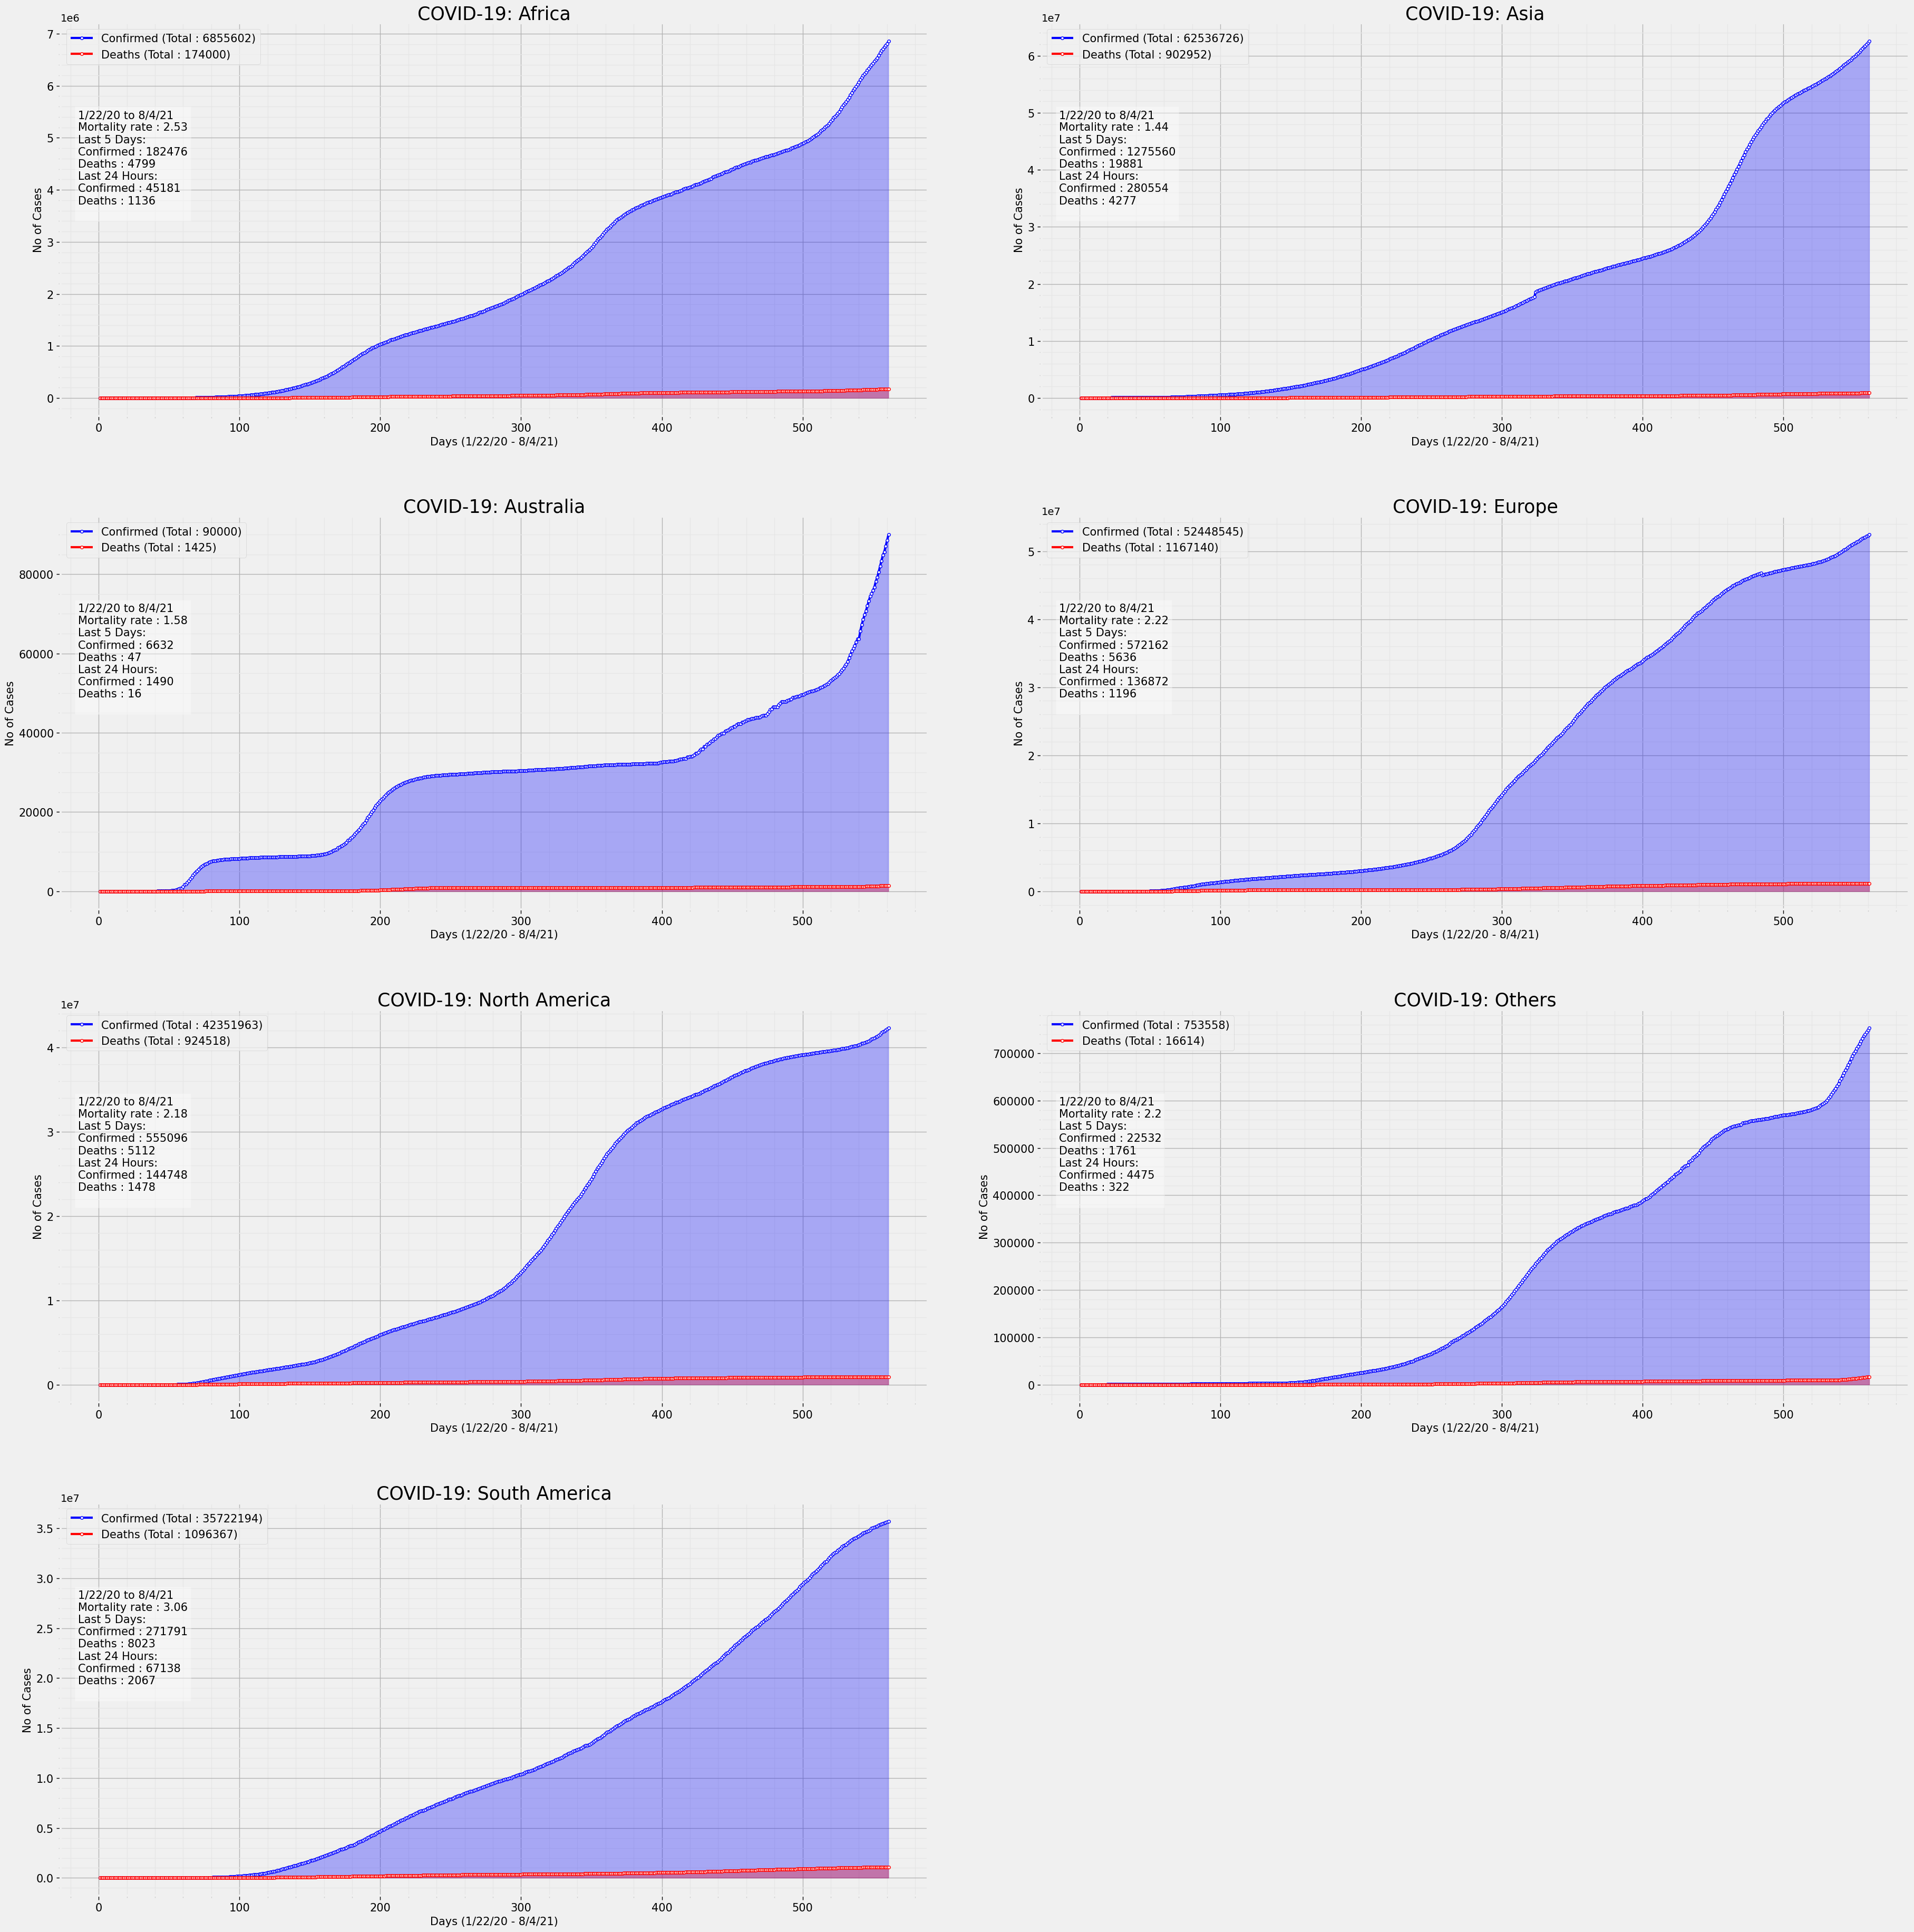

In [80]:
fig = plt.figure(figsize = (40,40))

fig1 = [fig,4,2,1]
fig2 = [fig,4,2,2]
fig3 = [fig,4,2,3]
fig4 = [fig,4,2,4]
fig5 = [fig,4,2,5]
fig6 = [fig,4,2,6]
fig7 = [fig,4,2,7]

visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[0], figure = fig1)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[1], figure = fig2)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[2], figure = fig3)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[3], figure = fig4)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[4], figure = fig5)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[5], figure = fig6)
visualize_covid_cases(confirmed_df,deaths_df,continent = continent_df.index[6], figure = fig7)

### 11.2

Modify the "plot_params" and "visualize_covid_cases" function to:
- Show up the results of the last 7 days instead of 5 days.
- Add the "Recoveries line" to the main chart.
- Add the "Total Recoveries" number to the small table.
- Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths,recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","yellow"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()


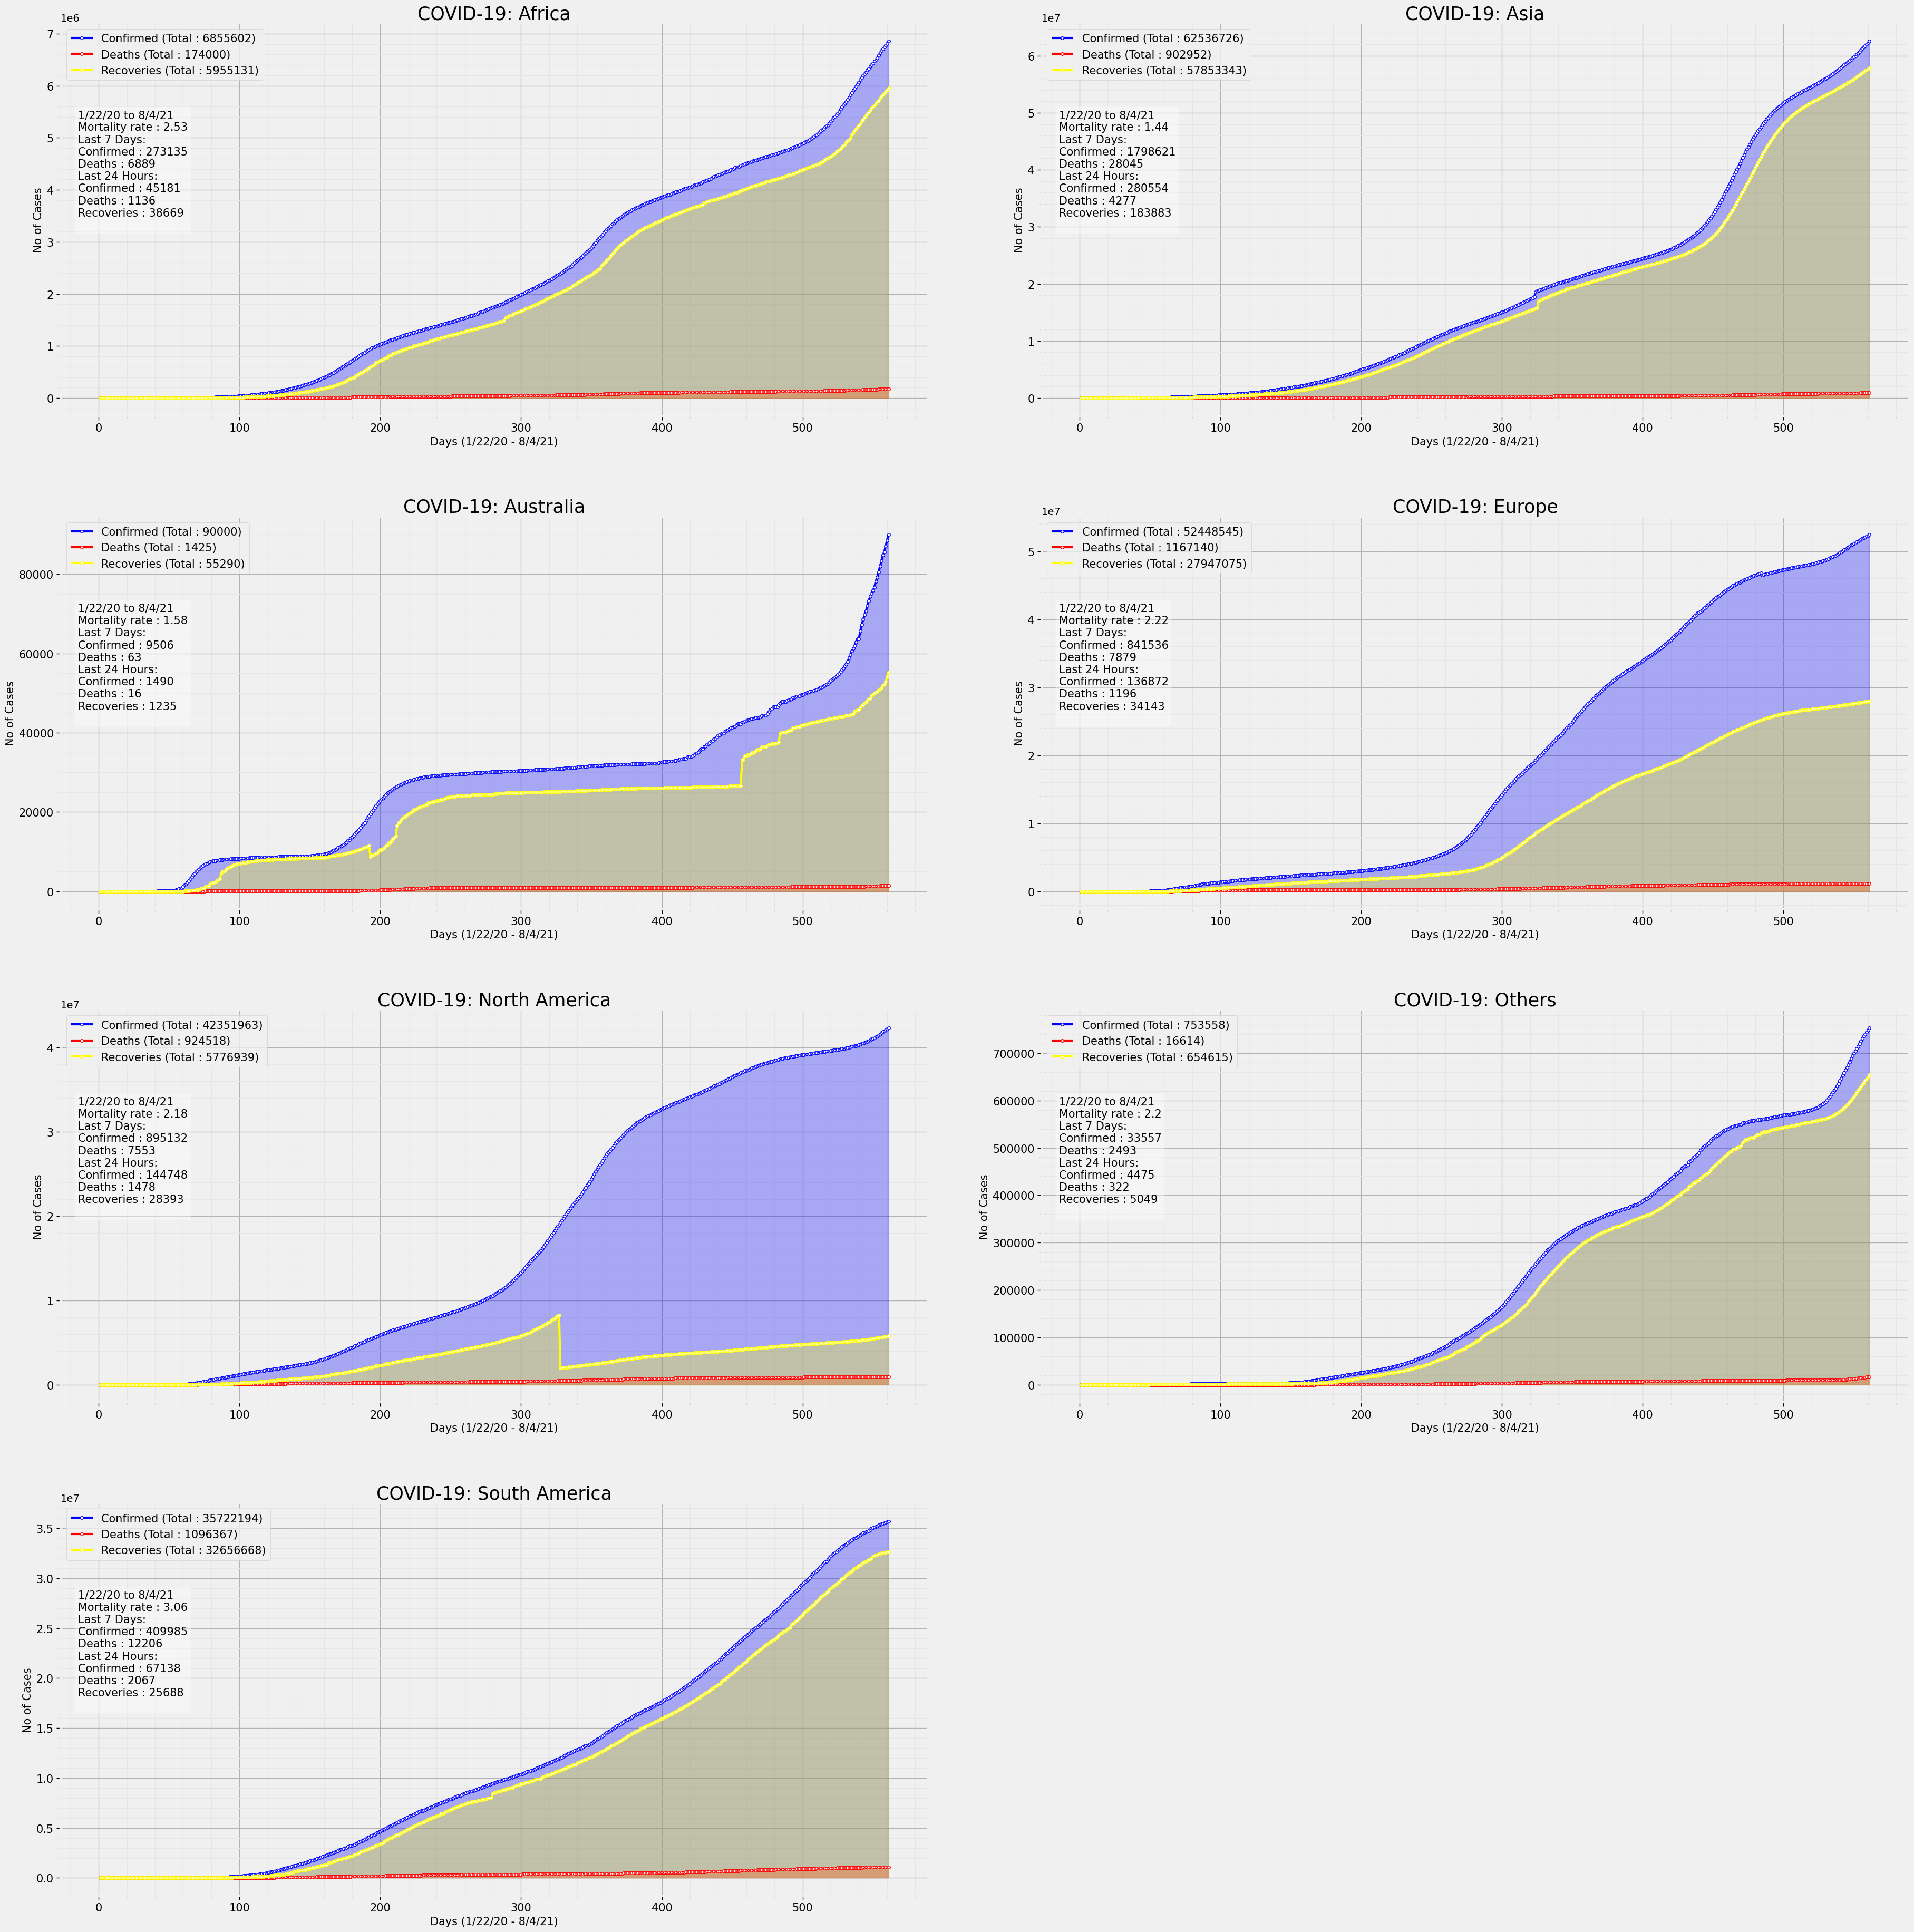

In [ ]:
fig = plt.figure(figsize = (40,40))

fig1 = [fig,4,2,1]
fig2 = [fig,4,2,2]
fig3 = [fig,4,2,3]
fig4 = [fig,4,2,4]
fig5 = [fig,4,2,5]
fig6 = [fig,4,2,6]
fig7 = [fig,4,2,7]

visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[0], figure = fig1)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[1], figure = fig2)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[2], figure = fig3)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[3], figure = fig4)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[4], figure = fig5)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[5], figure = fig6)
visualize_covid_cases(confirmed_df,deaths_df,recoveries_df,continent = continent_df.index[6], figure = fig7)

### Problem 12: Visualize the covariance matrix for continents_df.

<Axes: >

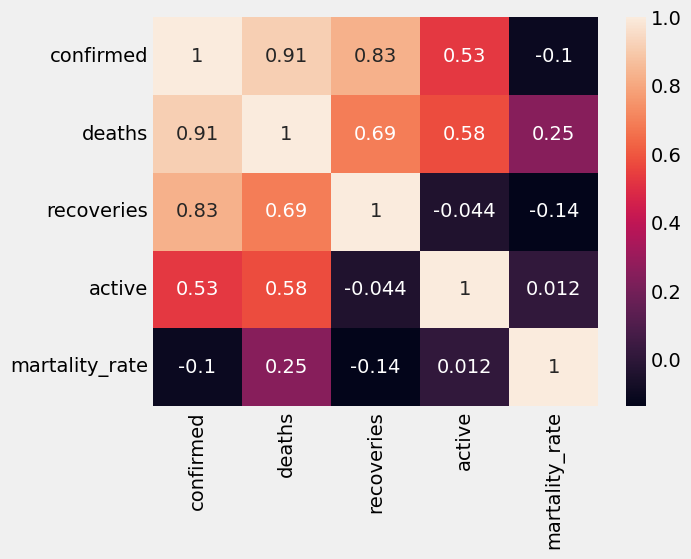

In [ ]:
# use heat to create corr matrix for continent_df
sns.heatmap(continent_df.corr(), annot = True)

### Problem 13:

Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents. Each field (confirm, deaths, ...) should be presented in different pie charts. You are not allowed to use repeated code snippet here, let try to use a for loop. Each continent should be presented in different colors.

In [ ]:
continent_df

confirmed   deaths  recoveries    active  martality_rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

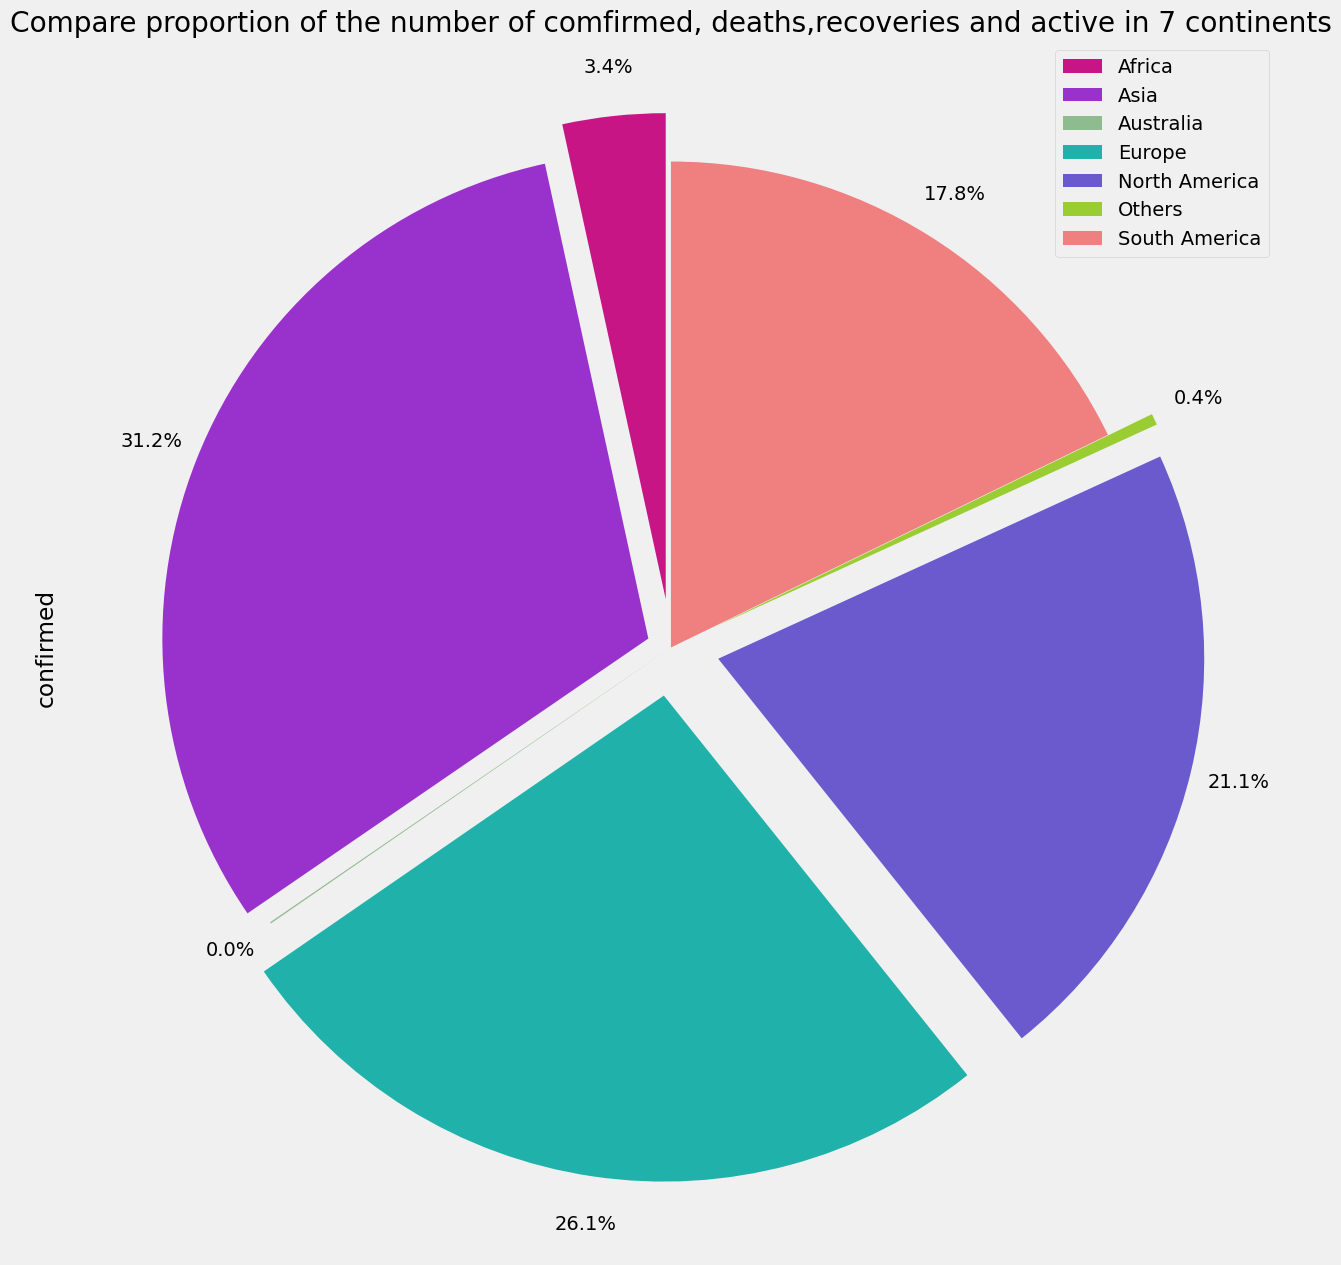

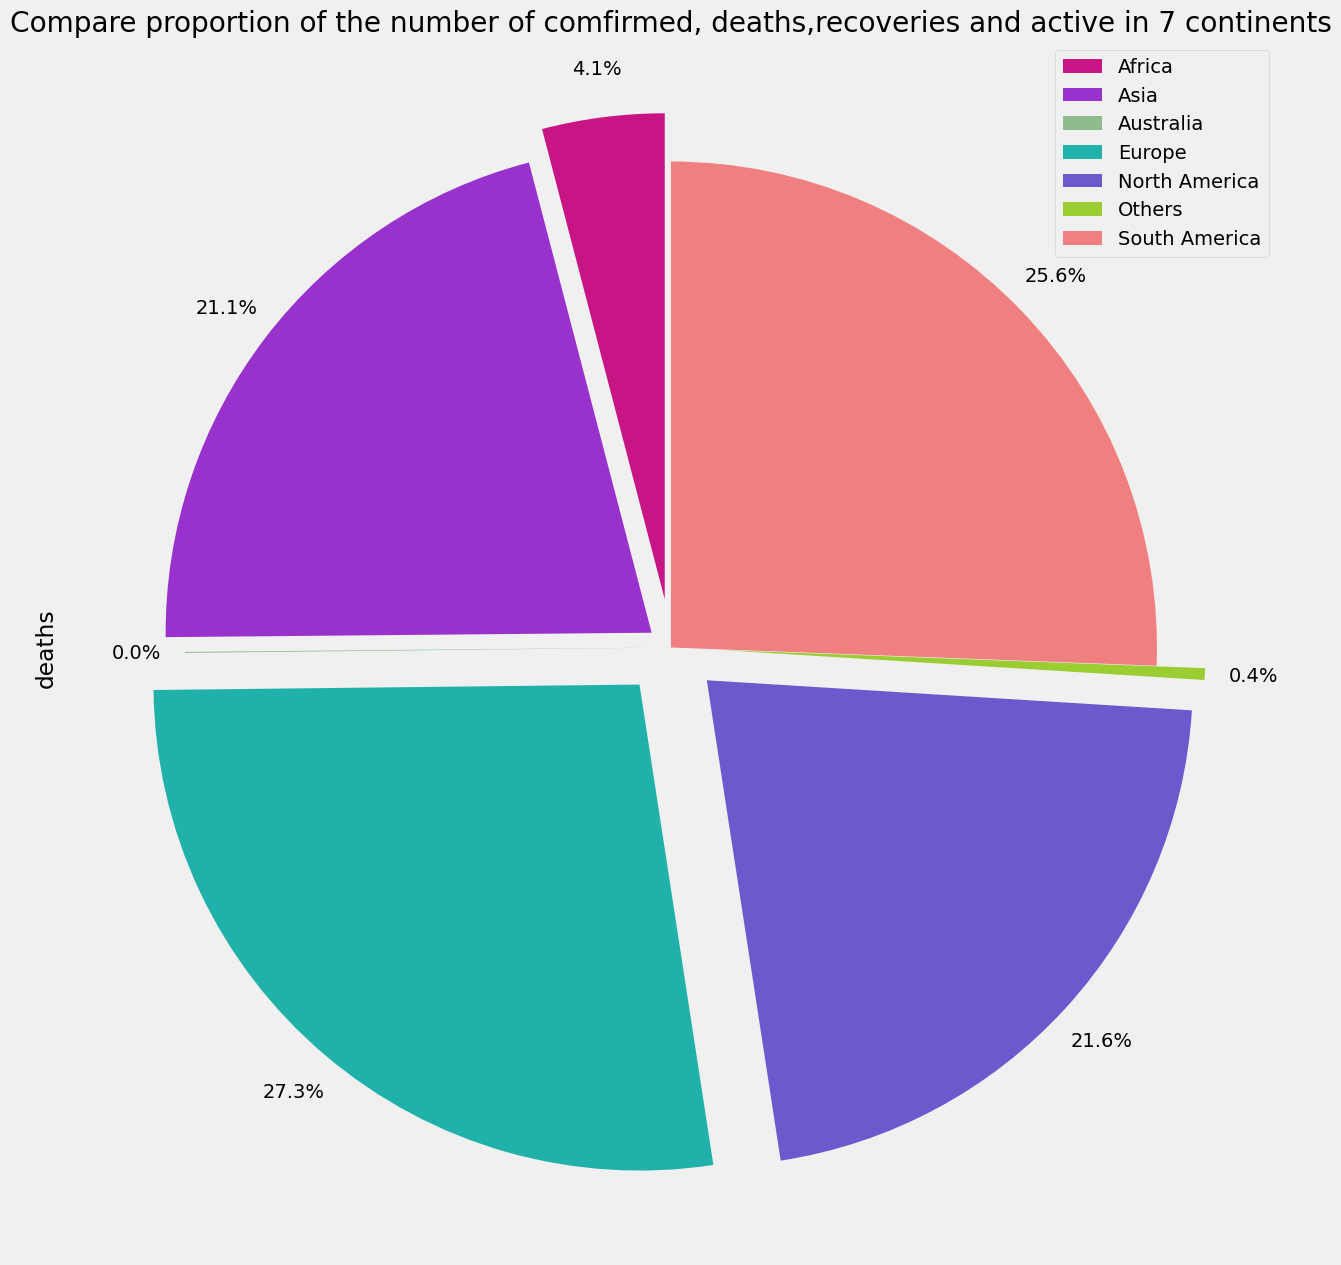

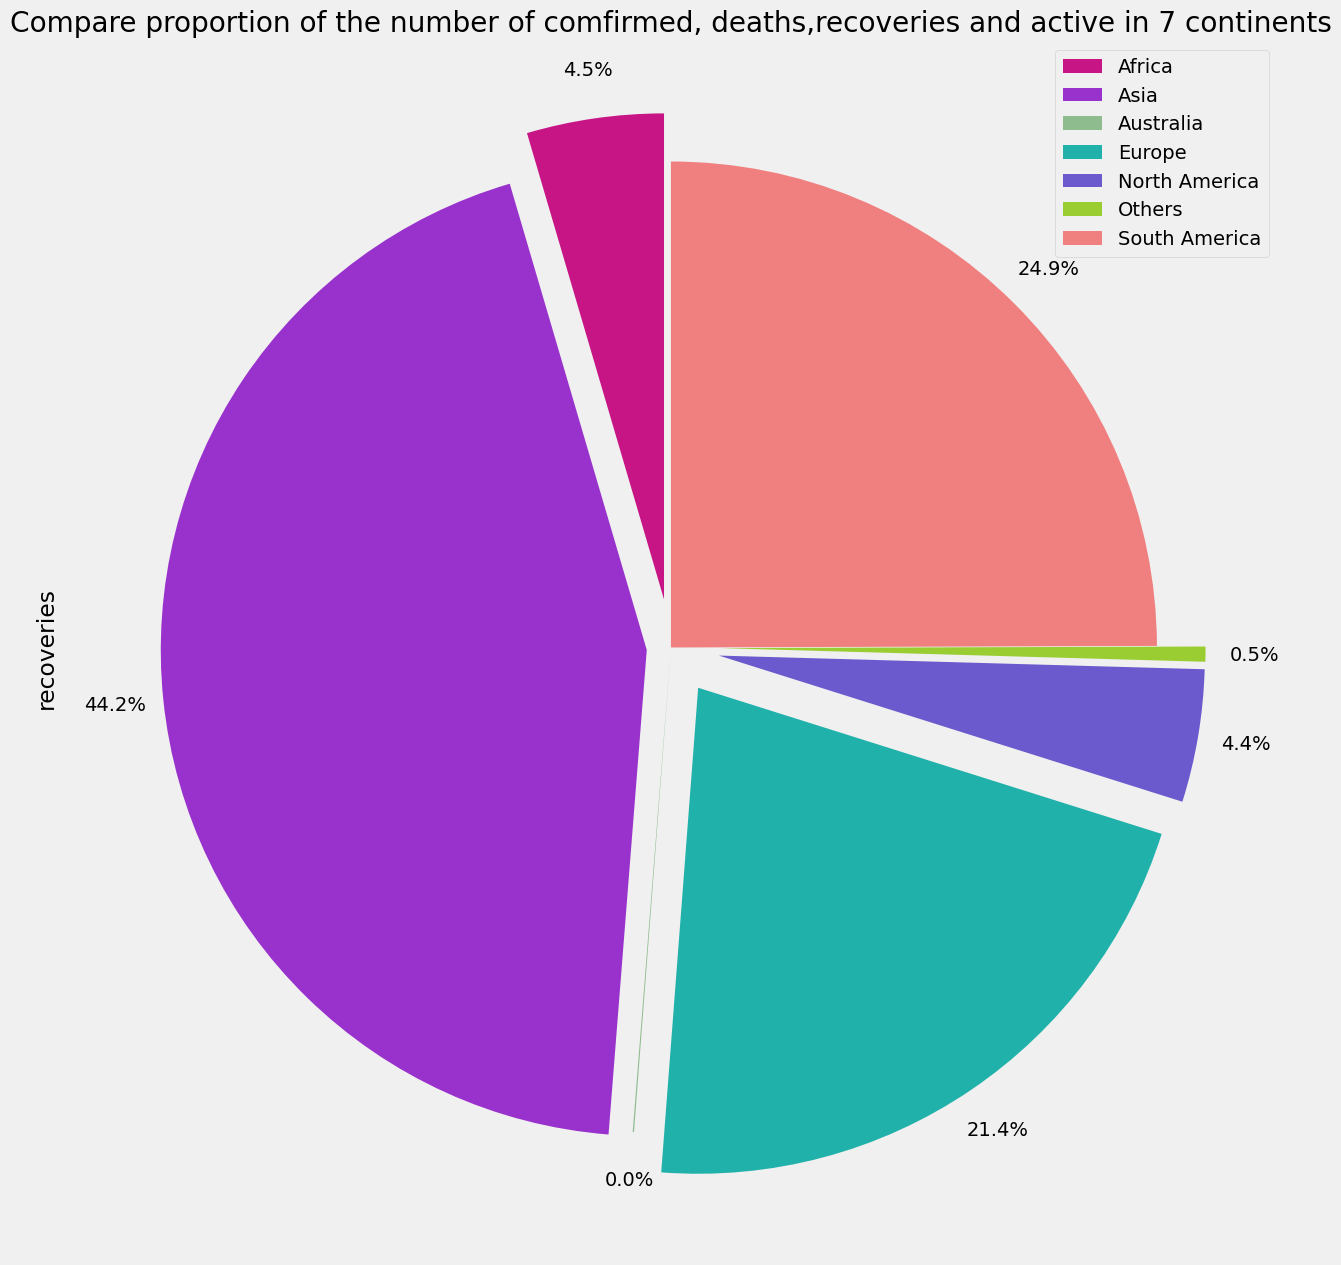

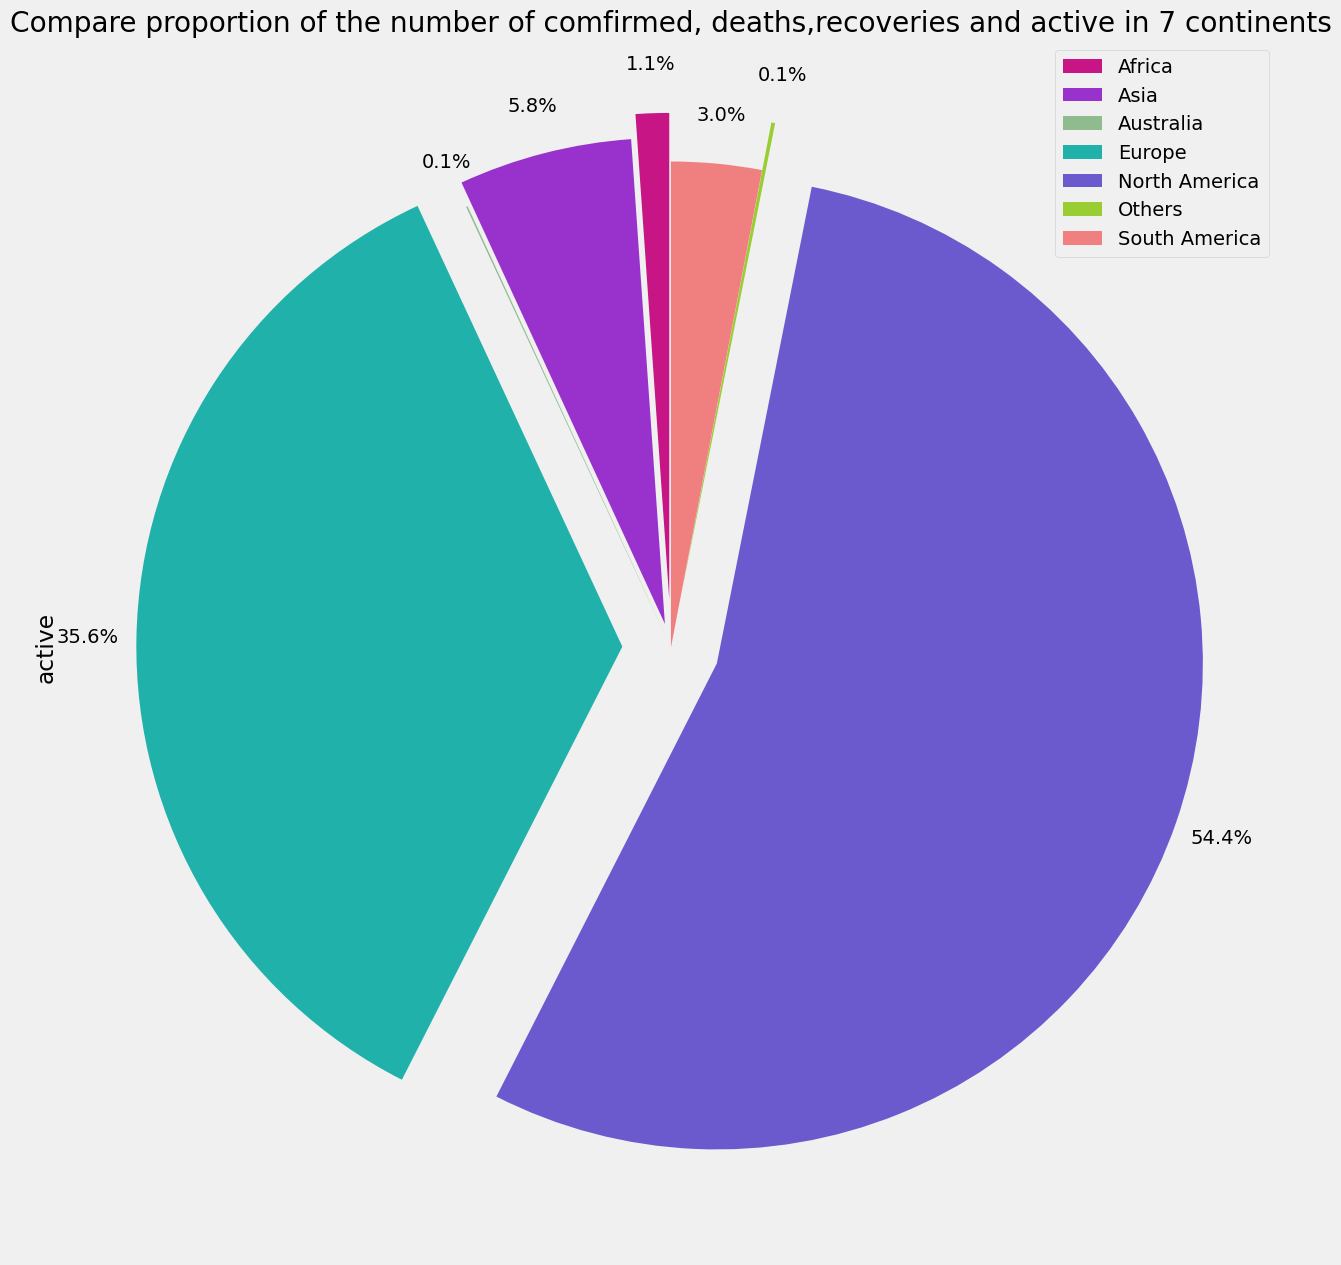

In [ ]:
colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral']
columns = ['confirmed','deaths','recoveries','active']
explode_list = [0.1,0.05,0,0.1,0.1,0.1,0]

for column in columns:
    fig = plt.figure(figsize = (25,15))
    ax1 = fig.add_subplot(1,1,1)

    continent_df[column].plot(kind ='pie',autopct = '%1.1f%%',startangle = 90, pctdistance = 1.1, figsize = (25,15),labels = None,
                              ax = ax1, explode = explode_list, colors = colors)

    plt.title('Compare proportion of the number of comfirmed, deaths,recoveries and active in 7 continents')
    plt.legend(labels = continent_df.index)

plt.show()



### Problem 14: Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.

In [ ]:
world_map = folium.Map(zoom_start = 2,tiles="CartoDB Positron")

for i in range(len(countries_df)):
    # get information of each country
    country_name = countries_df.index[i]
    lat = countries_df.iloc[i]['Lat']
    lng = countries_df.iloc[i]['Long']
    confirmed = countries_df.iloc[i]['Confirmed']
    deaths = countries_df.iloc[i]['Deaths']
    recoveries= countries_df.iloc[i]['Recoveries']
    active = countries_df.iloc[i]['Active']
    mortality_rate = countries_df.iloc[i]['mortality_rate']

    html=f"""
            <div>
                <h5 style="text-align: center;"><b>{country_name}</b></h5>
                <hr style="margin: 0 0 10px 0">
                <li style="list-style:circle;">Confirmed: {confirmed}</li>
                <li style="list-style:circle;">Deaths: {deaths}</li>
                <li style="list-style:circle;">Recovered: {recoveries}</li>
                <li style="list-style:circle;">Mortality Rate: {mortality_rate}</li>
            </div>
          """

    folium.Circle(radius = int(confirmed/50),
                  location = [lat,lng],
                  fill = True,
                  color = '#fc7b03',
                  fill_color = '#fc7b03',
                  tooltip = html).add_to(world_map)

world_map


### Problem 15: Build a px (plotly.express) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
import plotly.express as px

countries_active_case = countries_df[['Lat','Long','Active']].copy()
countries_active_case.replace(0,np.nan,inplace = True)
countries_active_case.dropna(inplace = True)

countries_active_case['log10_active'] = np.round(np.log10(countries_active_case['Active']),2)

fig = px.scatter_geo(countries_active_case,lat = 'Lat',lon = 'Long',color = countries_active_case.index,
                     hover_name = countries_active_case.index, size = 'log10_active')

fig.update_layout(
                  title = 'Log10 Active Cases by Countries')

fig.show()


### Problem 16: Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
countries_df_top10 = countries_df.sort_values(['Confirmed'],ascending = False)

In [ ]:
countries_df_top10 = countries_df_top10.head(10)

In [ ]:
countries_df_top10

continent        Lat        Long  Confirmed  Deaths  \
Country/Region                                                            
USA             North America  40.000000 -100.000000   35460776  611222   
India                    Asia  20.593684   78.962880   31812114  426290   
Brazil          South America -14.235000  -51.925300   20034407  559944   
Russia                 Europe  61.524010  105.318756    6274006  159032   
France                 Europe   3.933900  -53.125800    6272466  112245   
United Kingdom         Europe  18.220600  -63.068600    5980830  157209   
Turkey                   Asia  38.963700   35.243300    5822487   51767   
Argentina       South America -38.416100  -63.616700    4975616  106747   
Colombia        South America   4.570900  -74.297300    4815063  121695   
Spain                  Europe  40.463667   -3.749220    4545184   81844   

                Recoveries    Active  mortality_rate  
Country/Region                                        
USA                      0  34849554            1.72  
India             30974748    411076            1.34  
Brazil            17771228   1703235            2.79  
Russia             5609682    505292            2.53  
France              415111   5745110            1.79  
United Kingdom       24693   5798928            2.63  
Turkey             5478185    292535            0.89  
Argentina          4615834    253035            2.15  
Colombia           4615354     78014            2.53  
Spain               150376   4312964            1.80

### Problem 17: Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
trace1 = go.Bar(x =countries_df_top10.index, y = countries_df_top10['Confirmed'], name = 'Confirmed')
trace2 = go.Bar(x = countries_df_top10.index, y = countries_df_top10['Deaths'], name = 'Deaths')
trace3 = go.Bar(x = countries_df_top10.index, y = countries_df_top10['Recoveries'], name = 'Recoveries')
trace4 = go.Bar(x = countries_df_top10.index, y = countries_df_top10['Active'], name = 'Active')

data = [trace1,trace2,trace3,trace4]

layout = go.Layout(barmode = 'stack',showlegend = True,)

fig = go.Figure(data = data,layout = layout)
iplot(fig)

### Problem 18: Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?

### No, because my data is stoped record in 4/8/21 and in the line chart, the number of cases are still increasing

In [ ]:
total_confirmed_daily = confirmed_df.iloc[:,5:]

In [ ]:
total_confirmed_daily = total_confirmed_daily.sum(axis = 0)

In [ ]:
x = [i for i in range(1,562)]

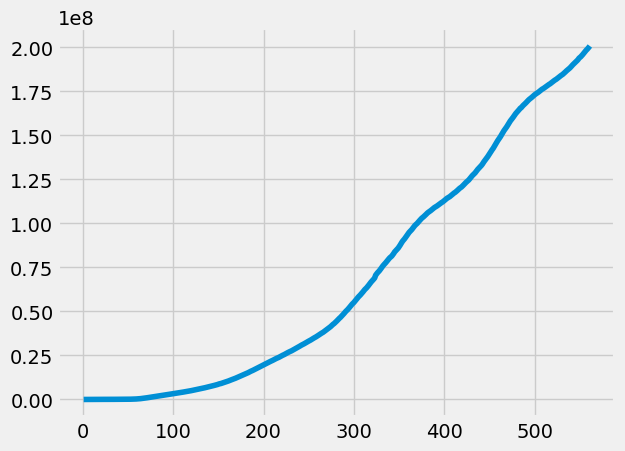

In [ ]:
plt.plot(x,total_confirmed_daily)

### Problem 19:
### Based on the data visualization on the continent part:

### 19.1 Which continent has the highest death rate over continents' active cases?

###    Europe: 27.25%

In [ ]:
continent_df

confirmed   deaths  recoveries    active  martality_rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

In [ ]:
continent_df['deaths_rate'] = np.round(continent_df['deaths']*100 / continent_df['deaths'].sum(), 2)

In [ ]:
continent_df

confirmed   deaths  recoveries    active  martality_rate  \
continent                                                                 
Africa           6855602   174000     5955131    726471            2.54   
Asia            62536726   902952    57853343   3780431            1.44   
Australia          90000     1425       55290     33285            1.58   
Europe          52448545  1167140    27947075  23334330            2.23   
North America   42351963   924518     5776939  35650506            2.18   
Others            753558    16614      654615     82329            2.20   
South America   35722194  1096367    32656668   1969159            3.07   

               deaths_rate  
continent                   
Africa                4.06  
Asia                 21.08  
Australia             0.03  
Europe               27.25  
North America        21.59  
Others                0.39  
South America        25.60

### 19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?

### North America : 54.36%

In [ ]:
continent_df['spread_rate'] = np.round(continent_df['active']*100 / continent_df['active'].sum(),2)

In [ ]:
continent_df

confirmed   deaths  recoveries    active  martality_rate  \
continent                                                                 
Africa           6855602   174000     5955131    726471            2.54   
Asia            62536726   902952    57853343   3780431            1.44   
Australia          90000     1425       55290     33285            1.58   
Europe          52448545  1167140    27947075  23334330            2.23   
North America   42351963   924518     5776939  35650506            2.18   
Others            753558    16614      654615     82329            2.20   
South America   35722194  1096367    32656668   1969159            3.07   

               deaths_rate  spread_rate  
continent                                
Africa                4.06         1.11  
Asia                 21.08         5.76  
Australia             0.03         0.05  
Europe               27.25        35.58  
North America        21.59        54.36  
Others                0.39         0.13  
South America        25.60         3.00

### 19.3 Which continent has the highest recoveries rate over continents' dataset?

### Asia: 44.20%

In [ ]:
continent_df['recoveries_rate'] = np.round(continent_df['recoveries']*100/continent_df['recoveries'].sum() ,2)

In [ ]:
continent_df

confirmed   deaths  recoveries    active  martality_rate  \
continent                                                                 
Africa           6855602   174000     5955131    726471            2.54   
Asia            62536726   902952    57853343   3780431            1.44   
Australia          90000     1425       55290     33285            1.58   
Europe          52448545  1167140    27947075  23334330            2.23   
North America   42351963   924518     5776939  35650506            2.18   
Others            753558    16614      654615     82329            2.20   
South America   35722194  1096367    32656668   1969159            3.07   

               deaths_rate  spread_rate  recoveries_rate  
continent                                                 
Africa                4.06         1.11             4.55  
Asia                 21.08         5.76            44.20  
Australia             0.03         0.05             0.04  
Europe               27.25        35.58            21.35  
North America        21.59        54.36             4.41  
Others                0.39         0.13             0.50  
South America        25.60         3.00            24.95

### Problem 20: Based on the data visualization on the country part:

### 20.1 Which country has the highest death rate over countries' dataset?

### *USA: 15.01%*

In [ ]:
countries_df['death_rate'] = np.round(countries_df['Deaths']*100/countries_df['Deaths'].sum(),2)

In [ ]:
countries_df.sort_values('death_rate',ascending = False,inplace = True)

In [ ]:
countries_df.head(1)

continent   Lat   Long  Confirmed  Deaths  Recoveries  \
Country/Region                                                              
USA             North America  40.0 -100.0   35460776  611222           0   

                  Active  mortality_rate  death_rate  
Country/Region                                        
USA             34849554            1.72       15.01

### 20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?

### USA: *53.01*

In [ ]:
countries_df['spread_rate'] = np.round(countries_df['Active']*100/countries_df['Active'].sum(),2)

In [ ]:
countries_df.sort_values('spread_rate',ascending = False,inplace = True)

In [ ]:
countries_df.head(1)

continent   Lat   Long  Confirmed  Deaths  Recoveries  \
Country/Region                                                              
USA             North America  40.0 -100.0   35460776  611222           0   

                  Active  mortality_rate  death_rate  spread_rate  
Country/Region                                                     
USA             34849554            1.72       15.01        53.01

### 20.3 Which country has the highest recoveries rate over countries' dataset?

### *India: 24.17%*

In [ ]:
countries_df['Recoveries_rate'] = np.round(countries_df['Recoveries']*100/countries_df['Recoveries'].sum(),2)

In [ ]:
countries_df.sort_values('Recoveries_rate',ascending = False,inplace = True)

In [ ]:
countries_df.head(1)

continent        Lat      Long  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
India               Asia  20.593684  78.96288   31812114  426290    30974748   

                Active  mortality_rate  death_rate  spread_rate  \
Country/Region                                                    
India           411076            1.34       10.47         0.63   

                Recoveries_rate  
Country/Region                   
India                     24.17

### Problem 21:
USA dataset

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

### 21.1 Which state has the highest death rate over states' dataset?

### New York: 24.64%

In [ ]:
us_medical_data['death_rate'] = np.round(us_medical_data['Deaths']*100 / us_medical_data['Deaths'].sum(),2)

In [ ]:
us_medical_data.sort_values('death_rate',ascending = False,inplace = True)

In [ ]:
us_medical_data.head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657 -74.9481   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  People_Hospitalized  \
36     397649   32057    71040.0  294552.0    36  ...              89995.0   

    Case_Fatality_Ratio         UID  ISO3  Testing_Rate Hospitalization_Rate  \
36                  NaN  84000036.0   USA  22042.910293            22.631768   

          Date  People_Tested Mortality_Rate  death_rate  
36  2020-07-06      4288131.0       8.061632       24.64  

[1 rows x 22 columns]

### 21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?

### New York: 26.5%


In [ ]:
us_medical_data['spread_rate'] = np.round(us_medical_data['Active']*100 / us_medical_data['Active'].sum(),2)

In [ ]:
us_medical_data.sort_values('spread_rate',ascending = False,inplace = True)

In [ ]:
us_medical_data.head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657 -74.9481   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  Case_Fatality_Ratio  \
36     397649   32057    71040.0  294552.0    36  ...                  NaN   

           UID  ISO3  Testing_Rate  Hospitalization_Rate        Date  \
36  84000036.0   USA  22042.910293             22.631768  2020-07-06   

    People_Tested  Mortality_Rate death_rate  spread_rate  
36      4288131.0        8.061632      24.64         26.5  

[1 rows x 23 columns]

### 21.3 Which state has the highest recoveries rate over states' dataset?

### Texas: 11.23%

In [ ]:
us_medical_data['Recovered_rate'] = np.round(us_medical_data['Recovered']*100 / us_medical_data['Recovered'].sum(),2)

In [ ]:
us_medical_data.sort_values('Recovered_rate',ascending = False,inplace = True)

In [ ]:
us_medical_data.head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
49          Texas             US  2020-07-07 04:34:13  31.0545 -97.5635   

    Confirmed  Deaths  Recovered   Active  FIPS  ...         UID  ISO3  \
49     204710    2891   103782.0  97880.0    48  ...  84000048.0   USA   

    Testing_Rate  Hospitalization_Rate        Date People_Tested  \
49   7462.194372                   NaN  2020-07-06     2163729.0   

    Mortality_Rate  death_rate spread_rate  Recovered_rate  
49        1.404168        2.22         8.8           11.23  

[1 rows x 24 columns]

### Problem 22: Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
state_top10 = us_medical_data.sort_values('Confirmed',ascending = False).head(10)

In [ ]:
state_top10

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657  -74.9481   
5      California             US  2020-07-07 04:34:13  36.1162 -119.6816   
11        Florida             US  2020-07-07 04:34:13  27.7663  -81.6868   
49          Texas             US  2020-07-07 04:34:13  31.0545  -97.5635   
34     New Jersey             US  2020-07-07 04:34:13  40.2989  -74.5210   
17       Illinois             US  2020-07-07 04:34:13  40.3495  -88.9861   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
12        Georgia             US  2020-07-07 04:34:13  33.0406  -83.6431   
43   Pennsylvania             US  2020-07-07 04:34:13  40.5908  -77.2098   

    Confirmed  Deaths  Recovered    Active  FIPS  ...         UID  ISO3  \
36     397649   32057    71040.0  294552.0    36  ...  84000036.0   USA   
5      284348    6369        NaN       NaN     6  ...  84000006.0   USA   
11     206447    3778        NaN       NaN    12  ...  84000012.0   USA   
49     204710    2891   103782.0   97880.0    48  ...  84000048.0   USA   
34     174766   15229    30729.0  128808.0    34  ...  84000034.0   USA   
17     147865    7026        NaN       NaN    17  ...  84000017.0   USA   
25     110137    8198    93157.0    8782.0    25  ...  84000025.0   USA   
3      101455    1829    11836.0   87790.0     4  ...  84000004.0   USA   
12      97064    2878        NaN       NaN    13  ...  84000013.0   USA   
43      94439    6762    70437.0   17240.0    42  ...  84000042.0   USA   

    Testing_Rate  Hospitalization_Rate        Date People_Tested  \
36  22042.910293             22.631768  2020-07-06     4288131.0   
5   12131.316935                   NaN  2020-07-06     4793353.0   
11  16572.504822              7.920677  2020-07-06     3559399.0   
49   7462.194372                   NaN  2020-07-06     2163729.0   
34  17441.745786             11.656519  2020-07-06     1549209.0   
17  14078.181818                   NaN  2020-07-06     1783962.0   
25      0.000002             10.413394  2020-07-06      899417.0   
3    8488.322873              5.113597  2020-07-06      873294.0   
12   9031.880900             12.279527  2020-07-06      958953.0   
43   6509.332261                   NaN  2020-07-06     1018320.0   

    Mortality_Rate  death_rate spread_rate  Recovered_rate  
36        8.061632       24.64       26.50            7.69  
5         2.233000        4.90         NaN             NaN  
11        1.830010        2.90         NaN             NaN  
49        1.404168        2.22        8.80           11.23  
34        8.713937       11.70       11.59            3.33  
17        4.751632        5.40         NaN             NaN  
25        7.443457        6.30        0.79           10.08  
3         1.802770        1.41        7.90            1.28  
12        2.965054        2.21         NaN             NaN  
43        7.160177        5.20        1.55            7.62  

[10 rows x 24 columns]

In [ ]:
x = np.asarray(state_top10['People_Tested']).reshape(-1,1)
y = np.asarray(state_top10['Confirmed'])

In [ ]:
model = LinearRegression(fit_intercept = True)
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_[0]

0.05905202884255083

In [ ]:
xfit = x
yfit = model.predict(x)

In [ ]:
print('Phuong trinh duong thang y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

Phuong trinh duong thang y = 0.06x + 52636.30


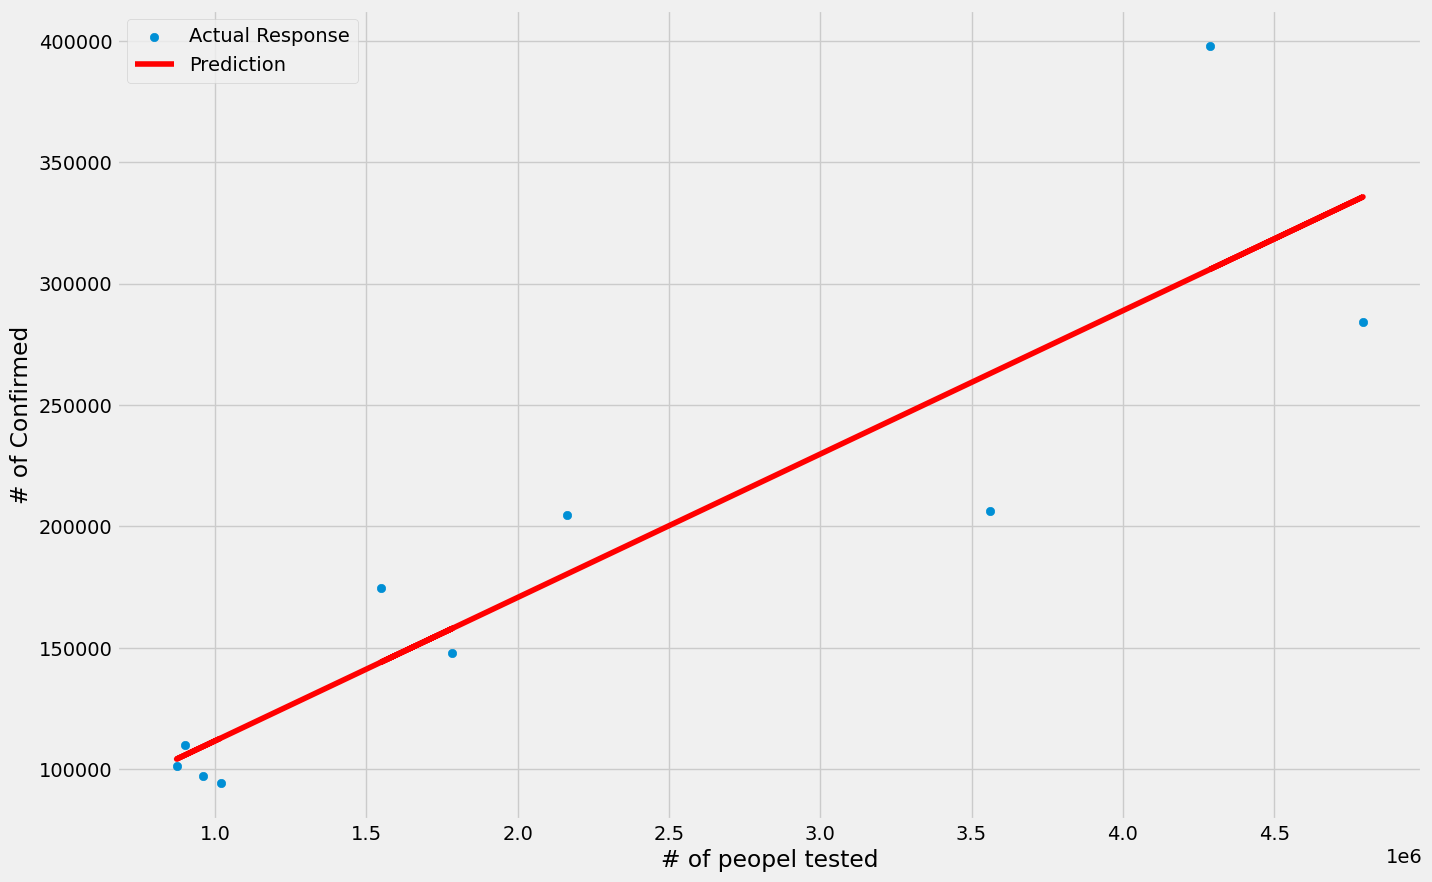

In [ ]:
fig = plt.figure(figsize = (15,10))

plt.scatter(x,y,label ='Actual Response')
plt.plot(xfit,yfit, label = 'Prediction',color = 'red')

plt.xlabel('# of peopel tested')
plt.ylabel('# of Confirmed')
plt.legend()